# Practical Application Project - Studying Carryaway Coupons
**By: Gabriel Diaz de Leon**

In [265]:
## Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

# Set svisualization preference for pandas
pd.set_option('display.max_columns', 27) # Showing tables will include all columns

# Load data, then clean and prepare it for analysis
data = pd.read_csv('data/coupons.csv') #import data
data.columns = data.columns.str.lower() #change all columns to lowercase to avoid syntactic mistakes
data = data.rename(columns={'passanger' : 'passenger'}) #correct spelling error, avoids syntactic mistakes
data['passenger'] = data['passenger'].str.strip('(s)') #simplify syntax of items for passenger column


# There are 3 distance columns, but all members of the second column belong to the first, and so on for third column
# 3 columns can thus be simplified into 1 by taking the sum of the 3 columns: 1 = 5min, 2 = 15min, 3 = 25min
# Remove original 3 columns
# Direction can be a binary variable for direction_same column, so eliminate direction_opp column
data['distance'] = data[['tocoupon_geq5min','tocoupon_geq15min','tocoupon_geq25min']].sum(axis=1)
data = data.drop(['tocoupon_geq5min','tocoupon_geq15min','tocoupon_geq25min','direction_opp'],axis=1) 
data = data.drop_duplicates()
data = data.drop('car',axis=1)
data = data.dropna()

# This function will simplify acceptance rates calculations throughout the current study
def accept_rate(df,var1,var2,var_class,accept):
    return df[df[var1]==var_class].groupby(var2)[accept].sum()/df[df[var1]==var_class].groupby(var2)[accept].count()

# This function will group the acceptance rate series into a new data frame
def unite_series(series_list, class_list):
    series_dict = {}
    for i in range(0,len(series_list)):
        series_dict[class_list[i]] = series_list[i]

    return pd.DataFrame(series_dict)

#def acceptance_dataframes(df,var1,var2,class_list,accept)

#data.head(10)

## Part 1: Statistics of Coupon Types
- We begin by characterizing how some important variables relate to all coupon types before focusing on a single group

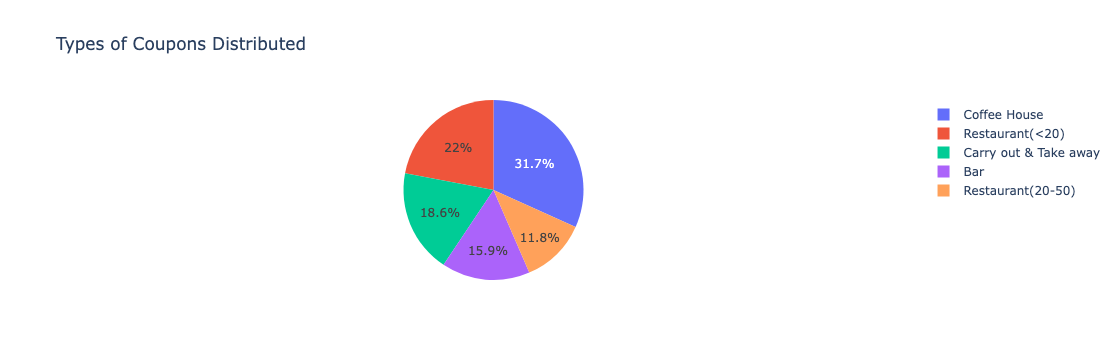

In [341]:
# First, visualize the types of coupons that were distributed and their relative proportions
#    This gives an idea of which coupon type has the largest sample population
#    Due to reasons that will be explained shortly, focus will be on the "Carry out & Take away" coupon group

coupons = ['Bar','Carry out & Take away','Coffee House','Restaurant(20-50)','Restaurant(<20)']
px.pie(data,'coupon',title='Types of Coupons Distributed')

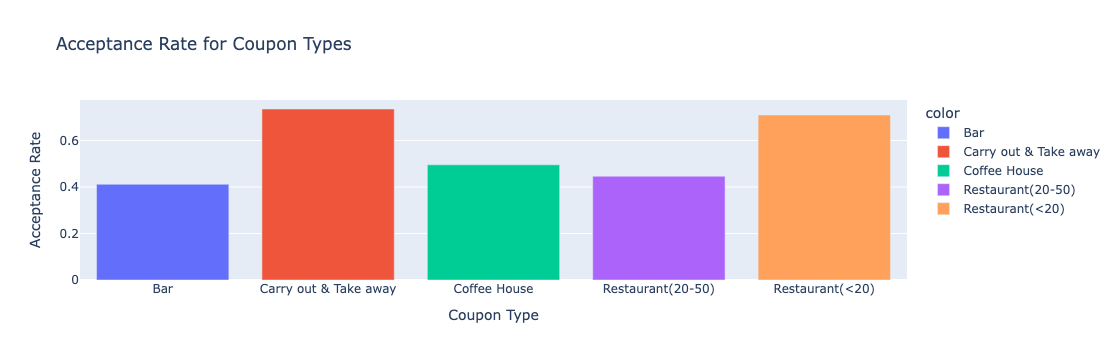

In [335]:
# Next, visualize the acceptance rate for each coupon type
#    The acceptance rate for carryout coupons is larger than for any other group, with a value over 70%
acceptance_by_coupon_type = data.groupby('coupon')['y'].sum()/data.groupby('coupon')['y'].count()
label_dict = {'coupon' : 'Coupon Type', 'value' : 'Acceptance Rate'}
px.bar(data_frame=acceptance_by_coupon_type,color=np.sort(data['coupon'].unique()),labels=label_dict,title='Acceptance Rate for Coupon Types')

In [287]:
## WE CALCULATE ACCEPTANCE RATES WITH TWO VARIABLES FOR THE FIRST TIME
#     - Some important factors to consider for spending patterns are education and income levels
#     - Compare the acceptance rates for coupon types based on both

# Create classes of coupon types for future use
variable = 'coupon'
class1 = 'Bar'
class2 = 'Carry out & Take away'
class3 = 'Coffee House'
class4 = 'Restaurant(20-50)'
class5 = 'Restaurant(<20)'

# Create acceptance rate series for each coupon type related to income and unite resultant series into new data frame
lv1 = accept_rate(df=data,var1=variable,var2='income',var_class=class1,accept='y')
lv2 = accept_rate(df=data,var1=variable,var2='income',var_class=class2,accept='y')
lv3 = accept_rate(df=data,var1=variable,var2='income',var_class=class3,accept='y')
lv4 = accept_rate(df=data,var1=variable,var2='income',var_class=class4,accept='y')
lv5 = accept_rate(df=data,var1=variable,var2='income',var_class=class5,accept='y')
coupon_income_acceptance = unite_series([lv1,lv2,lv3,lv4,lv5],[class1,class2,class3,class4,class5]) #INCOME data frame

# Create acceptance rate series for each coupon type related to income and unite resultant series into new data frame
lv1 = accept_rate(df=data,var1=variable,var2='education',var_class=class1,accept='y')
lv2 = accept_rate(df=data,var1=variable,var2='education',var_class=class2,accept='y')
lv3 = accept_rate(df=data,var1=variable,var2='education',var_class=class3,accept='y')
lv4 = accept_rate(df=data,var1=variable,var2='education',var_class=class4,accept='y')
lv5 = accept_rate(df=data,var1=variable,var2='education',var_class=class5,accept='y')
coupon_education_acceptance = unite_series([lv1,lv2,lv3,lv4,lv5],[class1,class2,class3,class4,class5]) #EDUCATION data frame

In [289]:
# Visualizing the resulting data frame related to income
coupon_income_acceptance.head(10)

,Bar,Carry out & Take away,Coffee House,Restaurant(20-50),Restaurant(<20)
income,,,,,
$100000 or More,0.480287,0.692557,0.486590,0.507538,0.722527
$12500 - $24999,0.420664,0.753165,0.552212,0.378238,0.679045
$25000 - $37499,0.453333,0.787115,0.465154,0.525822,0.767059
$37500 - $49999,0.364372,0.715210,0.547406,0.443878,0.682927
$50000 - $62499,0.405622,0.770909,0.498047,0.489691,0.773414
$62500 - $74999,0.356589,0.720779,0.435424,0.364583,0.695187
$75000 - $87499,0.377622,0.675159,0.298246,0.460784,0.688525
$87500 - $99999,0.286822,0.707006,0.535865,0.387755,0.576923
Less than $12500,0.459119,0.748744,0.540268,0.352459,0.719298


- The values are acceptance rates for each education group combined with each coupon type
- This method will allow us to summarize acceptance rate statistics when comparing two variables
- Afterwards, data subsets can be used in order to relate 3 different variables together

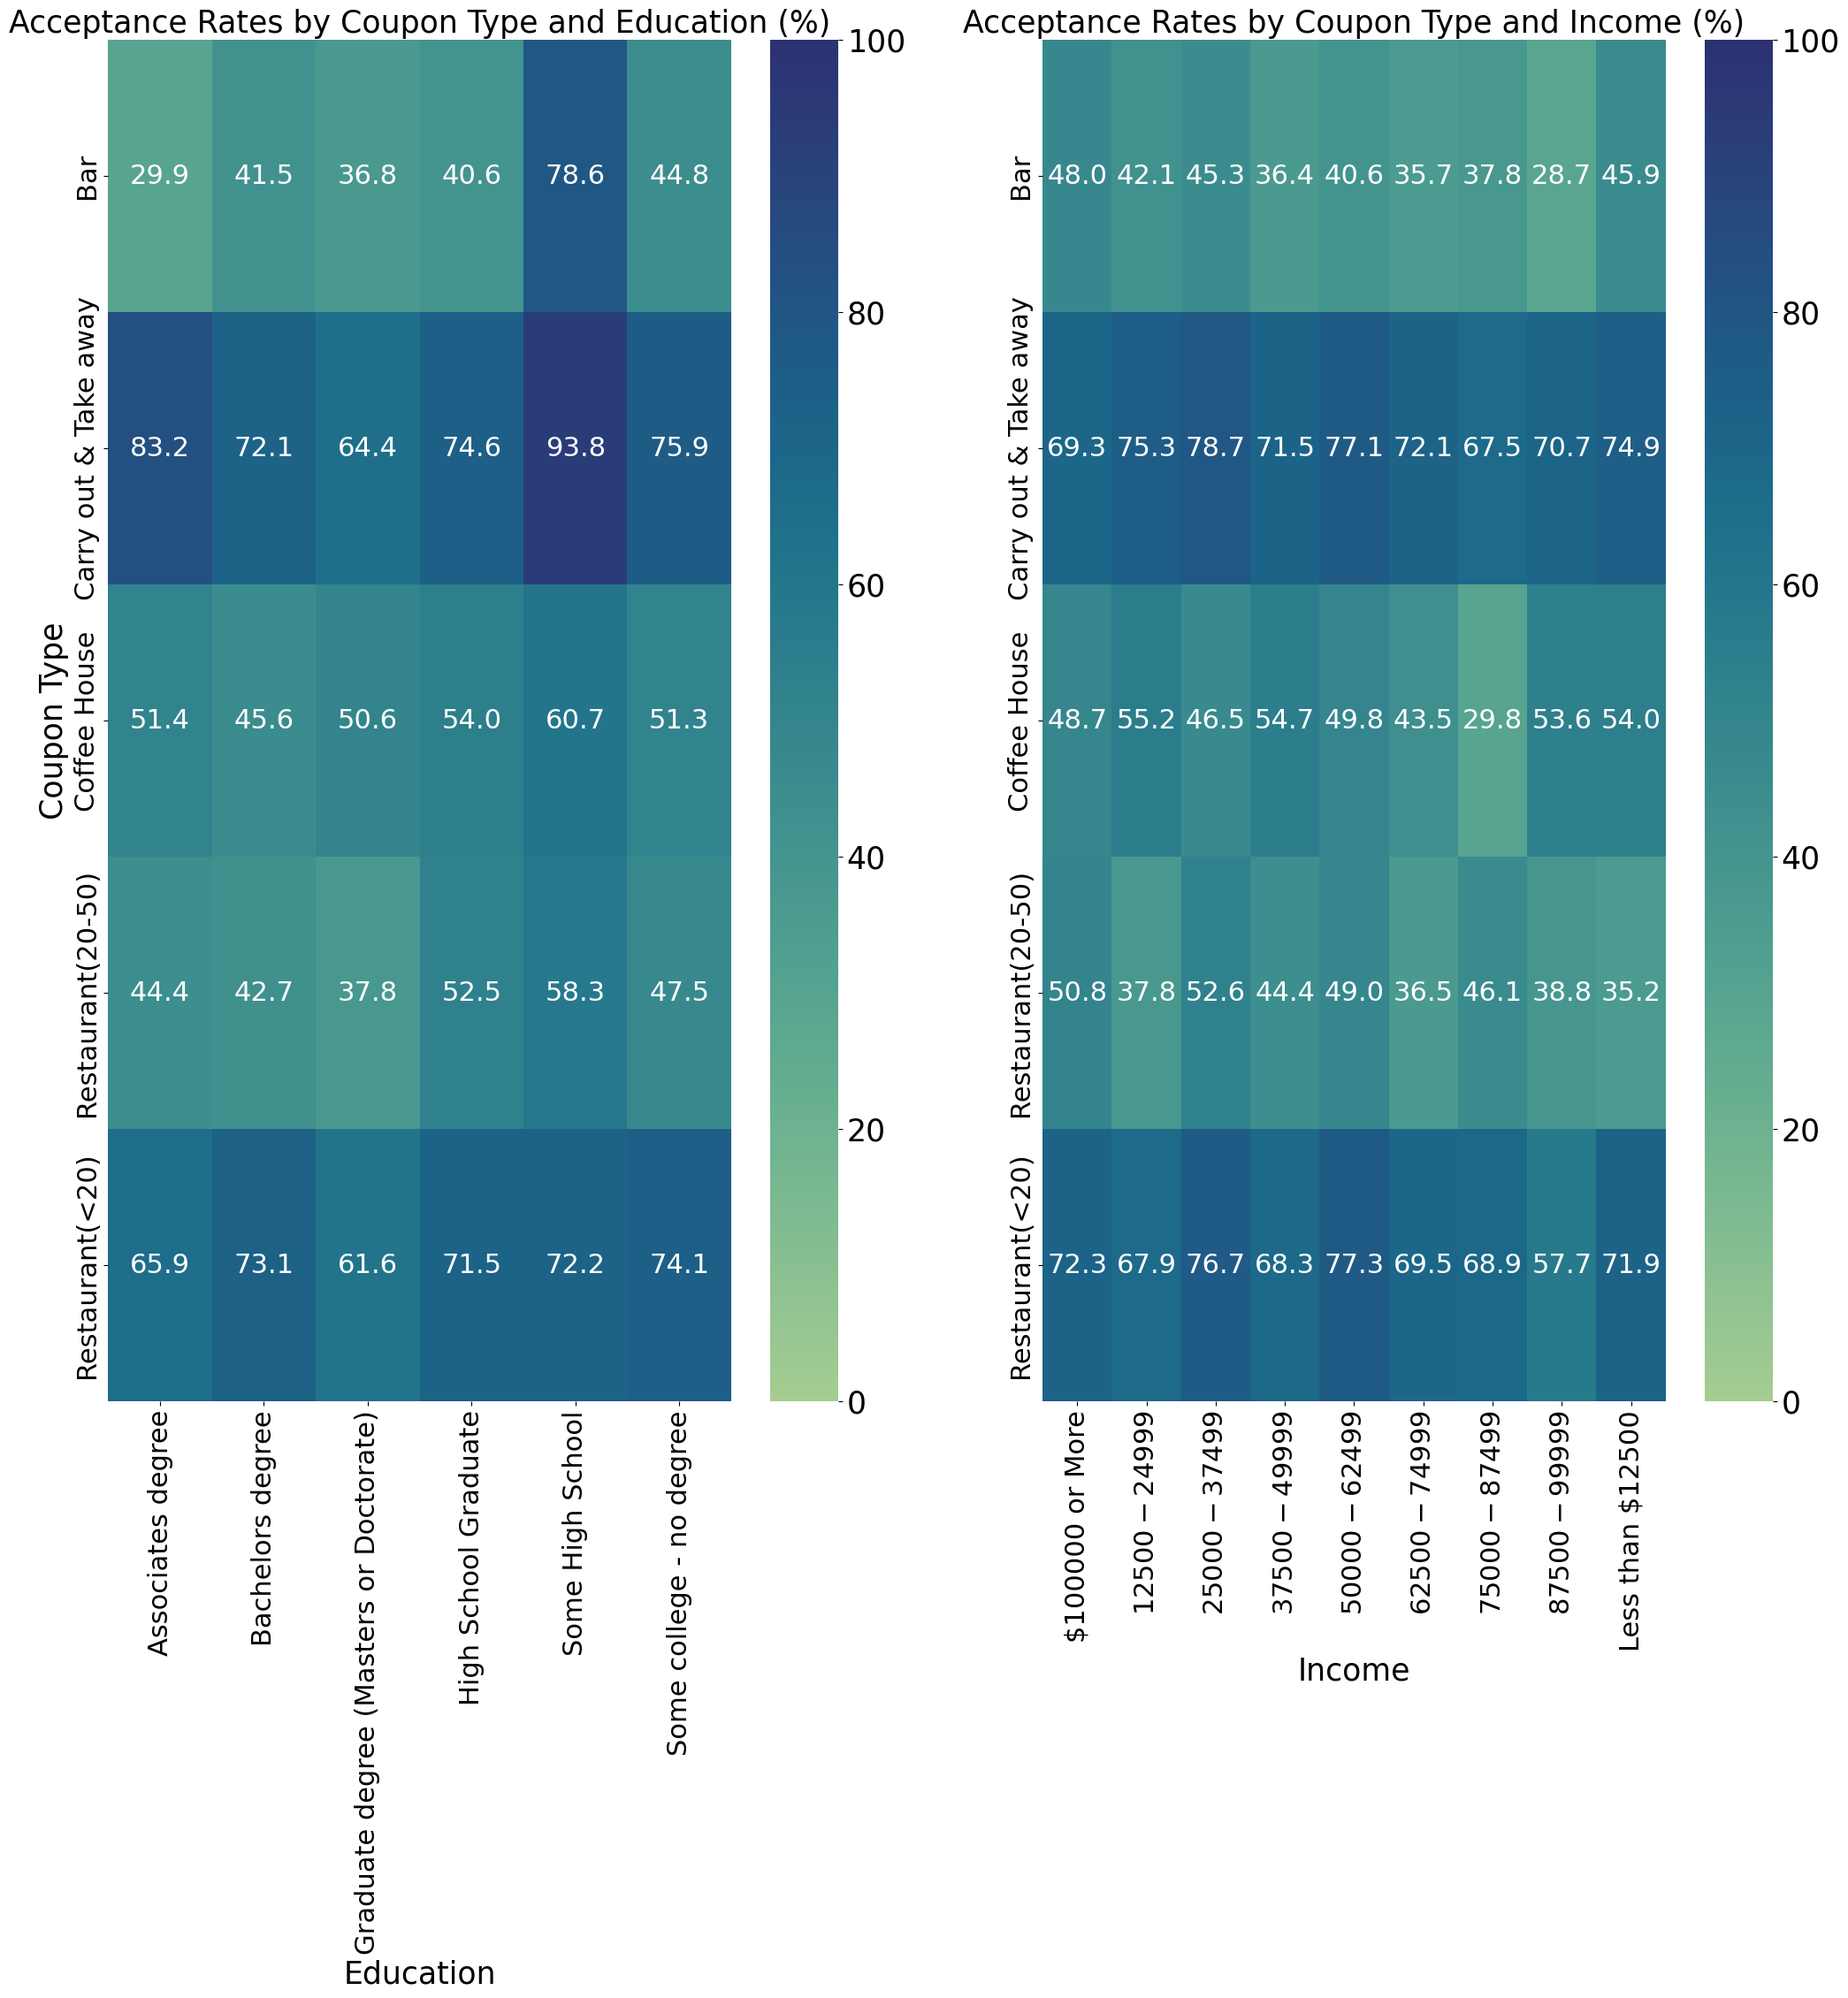

In [291]:
# Declare figure with subplots to visualize the relationship between coupon types with both education and income in same graphic
fig, axes = plt.subplots(1,2,figsize=(25,20))
figure_kwargs = {'fontsize': 22}

# Heatmap for education and subplot edits for human readability
sns.heatmap(coupon_education_acceptance.T*100,cbar=True,annot=True,robust=True,fmt=".1f",ax=axes[0],cmap='crest',annot_kws=figure_kwargs,vmin=0,vmax=100)
axes[0].set_xlabel('Education',fontsize=25)
axes[0].set_ylabel('Coupon Type',fontsize=25)
axes[0].tick_params(labelsize=22)
axes[0].set_title('Acceptance Rates by Coupon Type and Education (%)',fontsize=25)
cbar1 = axes[0].collections[0].colorbar
cbar1.ax.tick_params(labelsize=25)

# Heatmap for income and subplot edits for human readability
sns.heatmap(coupon_income_acceptance.T*100,cbar=True,annot=True,robust=True,fmt=".1f",ax=axes[1],cmap='crest',annot_kws=figure_kwargs,vmin=0,vmax=100)
axes[1].set_xlabel('Income',fontsize=25)
axes[1].set_ylabel('')
axes[1].tick_params(labelsize=22)
axes[1].set_title('Acceptance Rates by Coupon Type and Income (%)',fontsize=25)
cbar2 = axes[1].collections[0].colorbar
cbar2.ax.tick_params(labelsize=25)

- Carryout coupons have the highest acceptance rate across all education and income groups, serving as a good candidate for further study

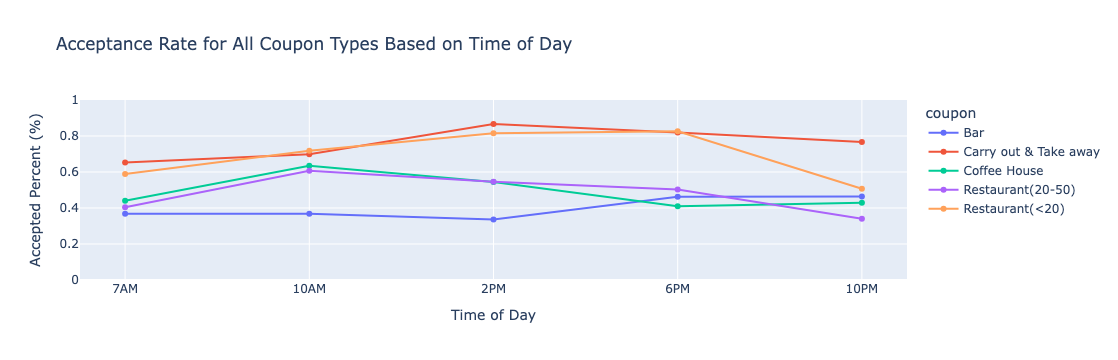

In [275]:
# Part 1 is concluded by visualizing how acceptance rates for all coupon types varies depending on the time of day
variable = 'time'

class1 = '7AM'
class2 = '10AM'
class3 = '2PM'
class4 = '6PM'
class5 = '10PM'

lv1 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class1,accept='y')
lv2 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class2,accept='y')
lv3 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class3,accept='y')
lv4 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class4,accept='y')
lv5 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class5,accept='y')

time_coupon_acceptance = unite_series([lv1,lv2,lv3,lv4,lv5],[class1,class2,class3,class4,class5]) #INCOME data frame
px.line(data_frame=time_coupon_acceptance.T,range_y=[0,1],labels={'index': 'Time of Day', 'value': 'Accepted Percent (%)'},
        markers=True,title='Acceptance Rate for All Coupon Types Based on Time of Day')

#### Part 1 Conclusions:
- Carryaway coupons have a high acceptance rate across many variables
- Carryaway coupons have a mid range proportion of times sent
- Based on the observed results, the focus of the following will be carryaway coupons 

## Part 2: Statistics of Carryaway Coupons
***PROBLEM STATEMENT: What variables demonstrate changes in acceptance rates related to carryout coupons, and what is the effect they have?***
- Comparing acceptance rate of carryaway coupons with respect to individual and combinations of variables
- The carryout data subset is isolated, then acceptance rate tables are created from pairs of variables
- The acceptance rate tables can be used for correlation analysis

In [196]:
# Create carryout data frame
carryout = data[data['coupon']=="Carry out & Take away"]

carryout.head(10)
n_obs = carryout.shape[0]

In [277]:
### Compare the acceptance rates for genders and marital statuses
#GENDER
variable = 'gender'
class1 = 'Female'
class2 = 'Male'

# Isolate series for each gender
lv1 = accept_rate(df=carryout,var1=variable,var2='maritalstatus',var_class=class1,accept='y')
lv2 = accept_rate(df=carryout,var1=variable,var2='maritalstatus',var_class=class2,accept='y')

# Combine gender series into new data frame
marital_gender_acceptance = unite_series([lv1,lv2],[class1,class2]) #INCOME data frame
marital_gender_acceptance = marital_gender_acceptance.reindex(['Single','Divorced','Widowed','Unmarried partner','Married partner'])


### Compare the acceptance rates for ages and presence of children
#AGE
variable = 'age'
class1 = 'below21'
class2 = '21'
class3 = '26'
class4 = '31'
class5 = '36'
class6 = '41'
class7 = '46'
class8 = '50plus'

# Acceptance rate series
lv1 = accept_rate(df=carryout,var1=variable,var2='has_children',var_class=class1,accept='y')
lv2 = accept_rate(df=carryout,var1=variable,var2='has_children',var_class=class2,accept='y')
lv3 = accept_rate(df=carryout,var1=variable,var2='has_children',var_class=class3,accept='y')
lv4 = accept_rate(df=carryout,var1=variable,var2='has_children',var_class=class4,accept='y')
lv5 = accept_rate(df=carryout,var1=variable,var2='has_children',var_class=class5,accept='y')
lv6 = accept_rate(df=carryout,var1=variable,var2='has_children',var_class=class6,accept='y')
lv7 = accept_rate(df=carryout,var1=variable,var2='has_children',var_class=class7,accept='y')
lv8 = accept_rate(df=carryout,var1=variable,var2='has_children',var_class=class8,accept='y')

# New data frame
child_age_acceptance = unite_series([lv1,lv2,lv3,lv4,lv5,lv6,lv7,lv8],[class1,class2,class3,class4,class5,class6,class7,class8])

# Change indexing of age rows to establish increasing age order
child_age_acceptance = child_age_acceptance.T.reindex(['below21','21','26','31','36','41','46','50plus'])

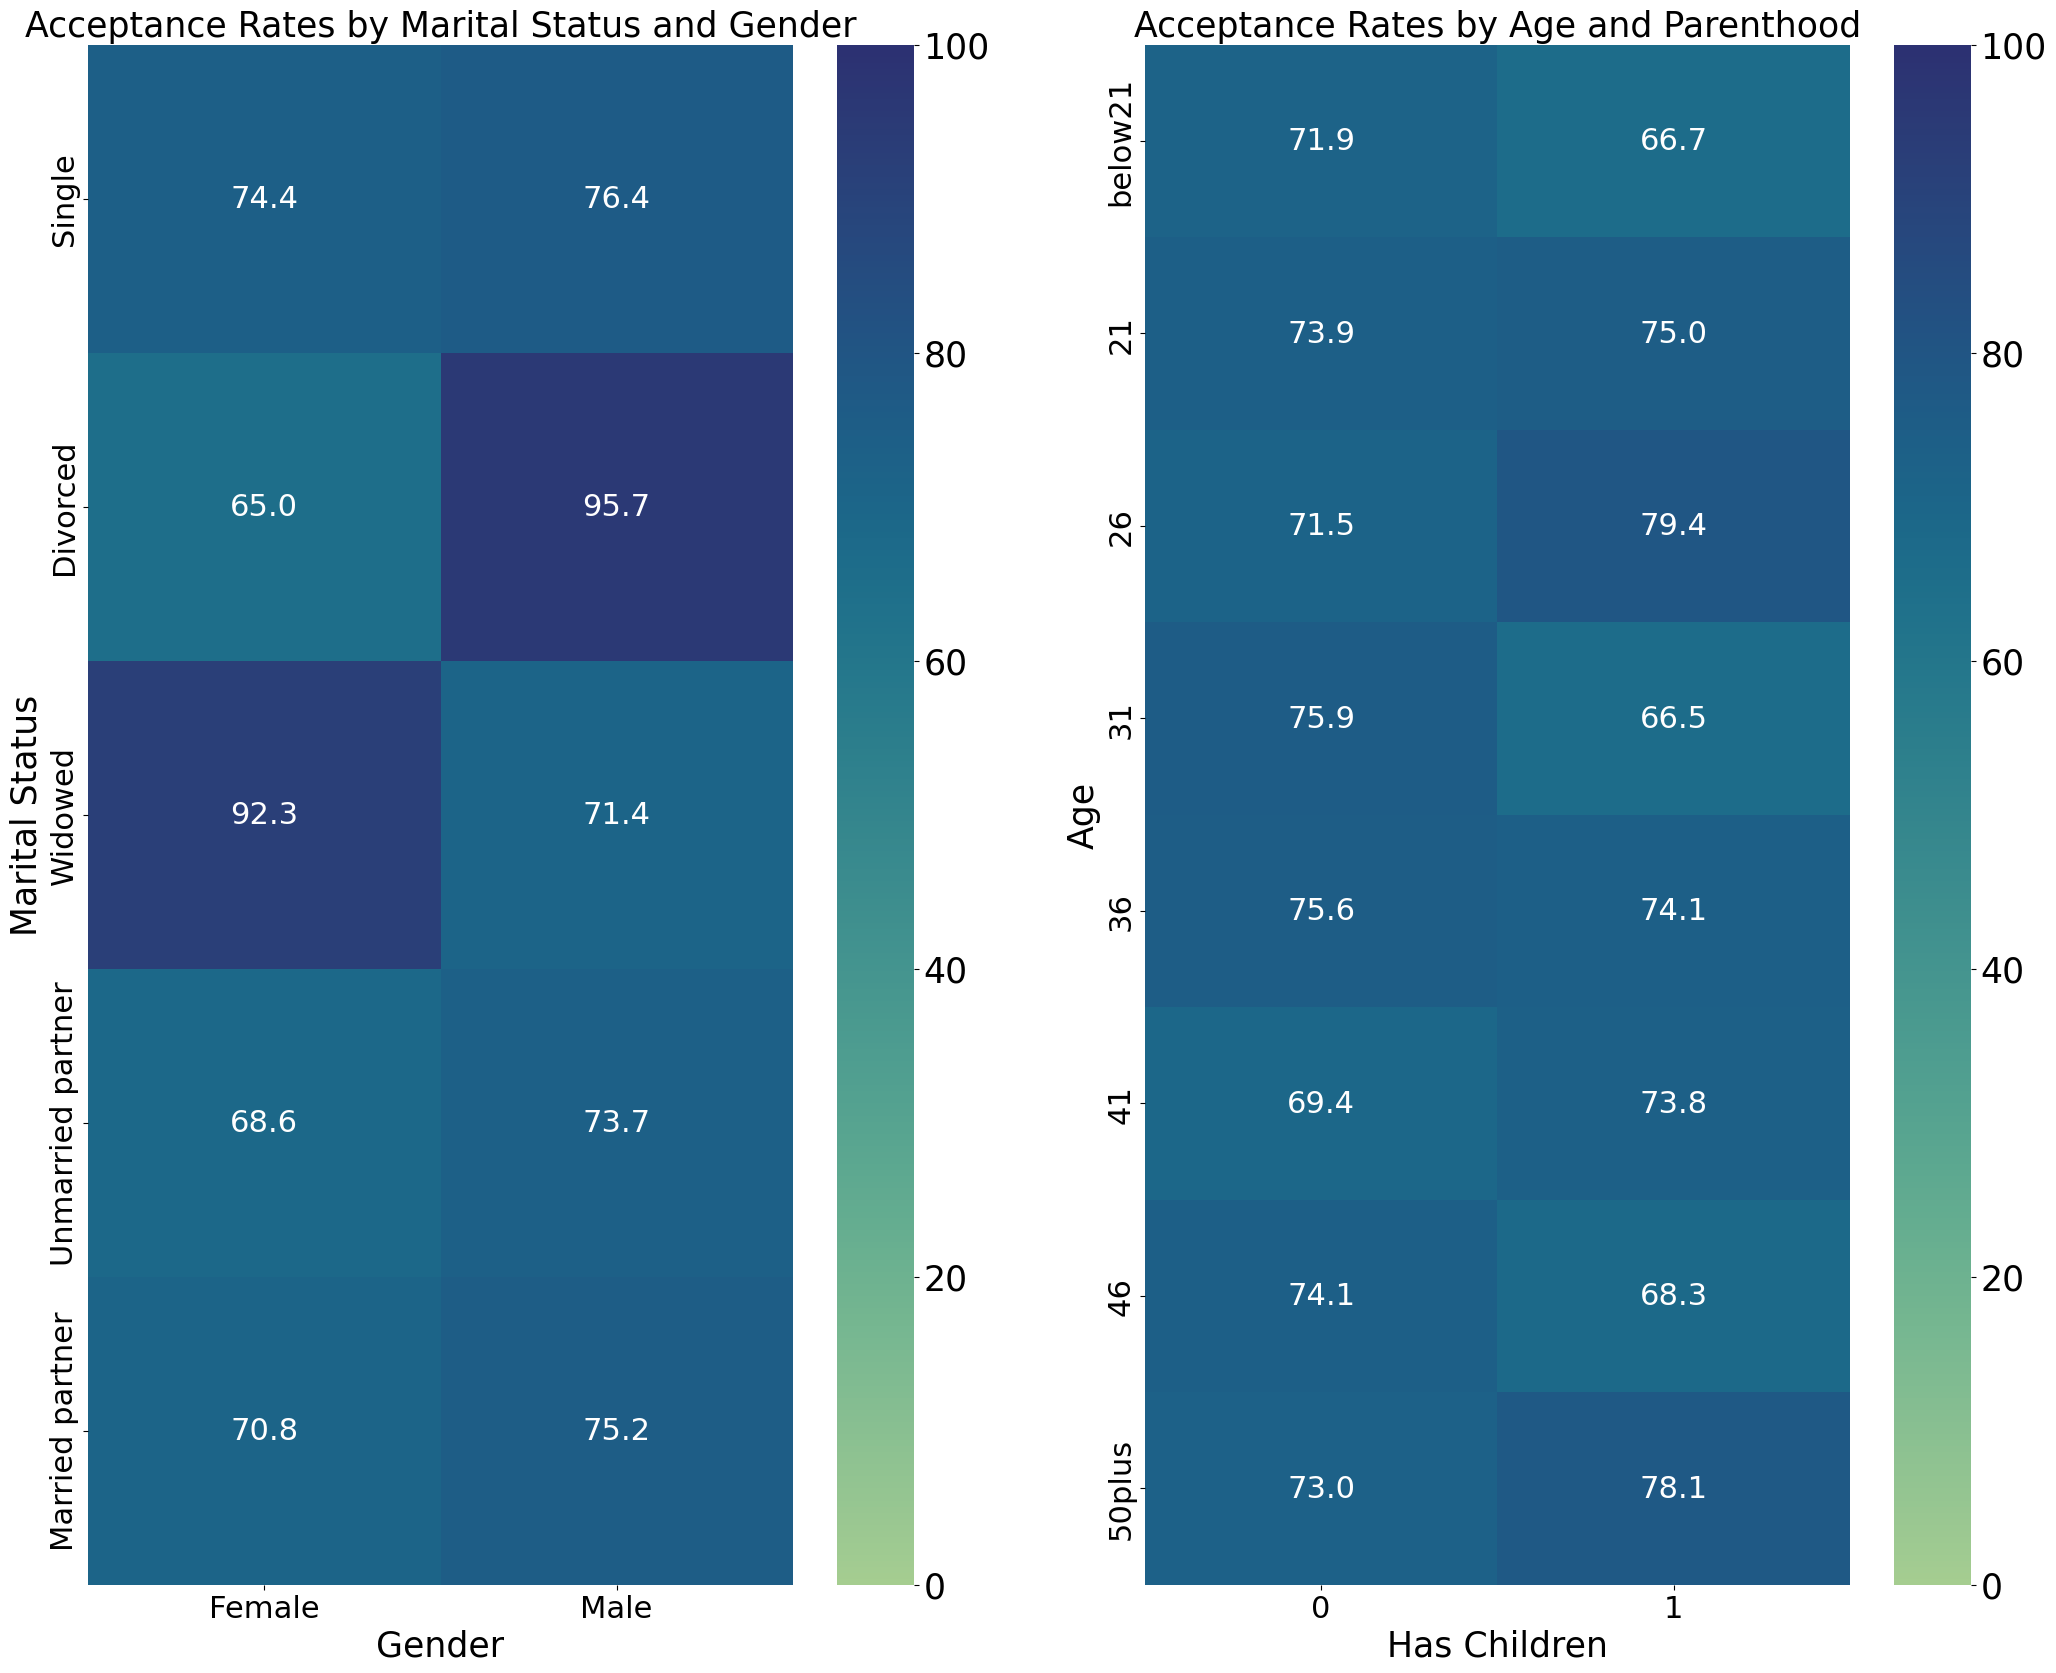

In [279]:
# We compare the acceptance rate of carryaway coupons for 2 distinct pairwise comparisons
fig, axes = plt.subplots(1,2,figsize=(25,20))
figure_kwargs = {'fontsize': 22}

# Left panel: acceptance rates based on marital status and gender, with human readiblity edits on figure
sns.heatmap(marital_gender_acceptance*100,cbar=True,annot=True,robust=True,fmt=".1f",ax=axes[0],cmap='crest',annot_kws=figure_kwargs,vmin=0,vmax=100)
axes[0].set_xlabel('Gender',fontsize=25)
axes[0].set_ylabel('Marital Status',fontsize=25)
axes[0].tick_params(labelsize=22)
axes[0].set_title('Acceptance Rates by Marital Status and Gender',fontsize=25)
cbar1 = axes[0].collections[0].colorbar
cbar1.ax.tick_params(labelsize=25)

# Right panel: acceptance rates based on age and presence of children, with human readability edits on figure
sns.heatmap(child_age_acceptance*100,cbar=True,annot=True,robust=True,fmt=".1f",ax=axes[1],cmap='crest',annot_kws=figure_kwargs,vmin=0,vmax=100)
axes[1].set_xlabel('Has Children',fontsize=25)
axes[1].set_ylabel('Age',fontsize=25)
axes[1].tick_params(labelsize=22)
axes[1].set_title('Acceptance Rates by Age and Parenthood',fontsize=25)
cbar2 = axes[1].collections[0].colorbar
cbar2.ax.tick_params(labelsize=25)

In [281]:
## Calculate 3 other pairwise comparisons of variables
# 1) Expiration time and Income
# 2) Direction and Income
# 3) Distance and Temperature

# Prepare (1)
variable = 'expiration'
class1 = '2h'
class2 = '1d'

lv1 = accept_rate(df=carryout,var1=variable,var2='income',var_class=class1,accept='y')
lv2 = accept_rate(df=carryout,var1=variable,var2='income',var_class=class2,accept='y')

income_expiry_acceptance = unite_series([lv1,lv2],[class1,class2])
income_expiry_acceptance = income_expiry_acceptance.reindex(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999',
                                                             '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999',
                                                             '$100000 or More'])
income_expiry_acceptance = income_expiry_acceptance.rename({'$12500 - $24999': '\$12500 - $24999', '$25000 - $37499': '\$25000 - $37499',
                                                            '$37500 - $49999': '\$37500 - $49999', '$50000 - $62499': '\$50000 - $62499',
                                                            '$62500 - $74999': '\$62500 - $74999', '$75000 - $87499': '\$75000 - $87499',
                                                            '$87500 - $99999': '\$87500 - $99999'})

# Prepare (2)
variable = 'direction_same'
class1 = 0
class2 = 1

lv1 = accept_rate(df=carryout,var1=variable,var2='income',var_class=class1,accept='y')
lv2 = accept_rate(df=carryout,var1=variable,var2='income',var_class=class2,accept='y')

income_direction_acceptance = unite_series([lv1,lv2],[class1,class2])
income_direction_acceptance = income_direction_acceptance.reindex(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999',
                                                             '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999',
                                                             '$100000 or More'])
income_direction_acceptance = income_direction_acceptance.rename({'$12500 - $24999': '\$12500 - $24999', '$25000 - $37499': '\$25000 - $37499',
                                                            '$37500 - $49999': '\$37500 - $49999', '$50000 - $62499': '\$50000 - $62499',
                                                            '$62500 - $74999': '\$62500 - $74999', '$75000 - $87499': '\$75000 - $87499',
                                                            '$87500 - $99999': '\$87500 - $99999'})

# Prepare (3)
variable = 'distance'
class1 = 1 # 5min distance
class2 = 2 # 15min distance
class3 = 3 # 25min distance

lv1 = accept_rate(df=carryout,var1=variable,var2='temperature',var_class=class1,accept='y')
lv2 = accept_rate(df=carryout,var1=variable,var2='temperature',var_class=class2,accept='y')
lv3 = accept_rate(df=carryout,var1=variable,var2='temperature',var_class=class3,accept='y')

temp_dist_acceptance = unite_series([lv1,lv2,lv3],[class1,class2,class3])

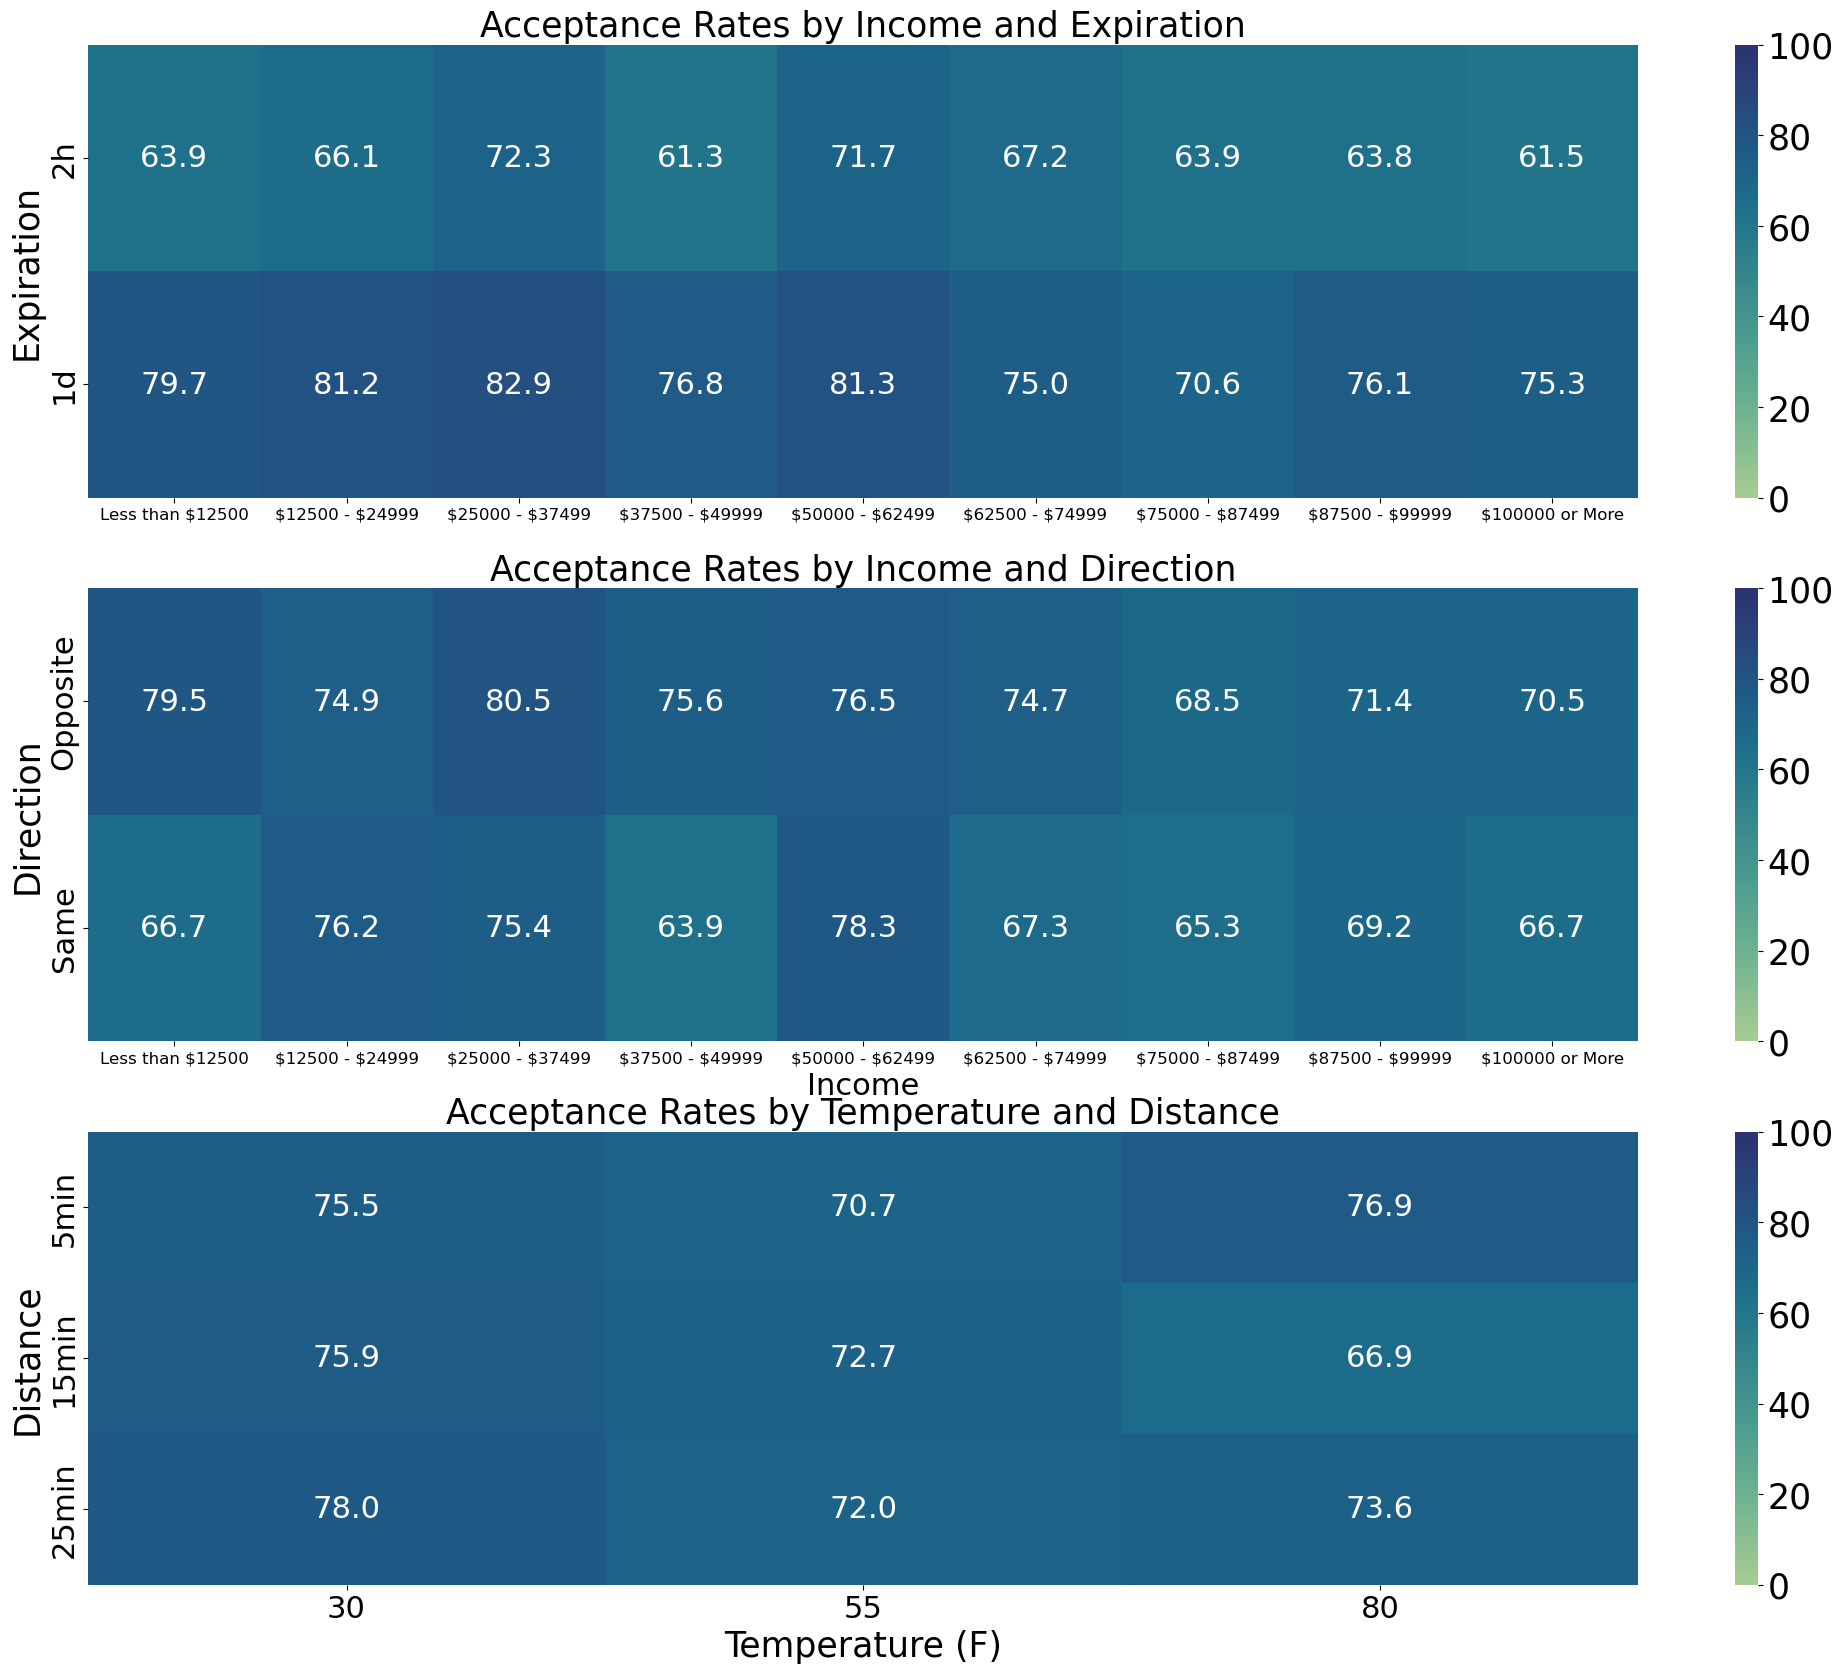

In [204]:
# We compare the acceptance rates for (1), (2), and (3). The reason for grouping these 3 figures together is clarified after the graphic
fig, axes = plt.subplots(3,1,figsize=(25,20))
figure_kwargs = {'fontsize': 22}

# Create heatmap for (1) and edit figure for human readability
sns.heatmap(income_expiry_acceptance.T*100,cbar=True,annot=True,robust=True,fmt=".1f",ax=axes[0],cmap='crest',annot_kws=figure_kwargs,vmin=50,vmax=100)
axes[0].set_xlabel('')
axes[0].set_ylabel('Expiration',fontsize=25)
axes[0].tick_params(axis='x',labelsize=12)
axes[0].tick_params(axis='y',labelsize=22)
axes[0].set_title('Acceptance Rates by Income and Expiration',fontsize=25)
cbar1 = axes[0].collections[0].colorbar
cbar1.ax.tick_params(labelsize=25)

# Create heatmap for (2) and edit figure for human readability
income_direction_acceptance = income_direction_acceptance.rename({0: 'Opposite', 1: 'Same'},axis=1)
sns.heatmap(income_direction_acceptance.T*100,cbar=True,annot=True,robust=True,fmt=".1f",ax=axes[1],cmap='crest',annot_kws=figure_kwargs,vmin=0,vmax=100)
axes[1].set_xlabel('Income',fontsize=22)
axes[1].set_ylabel('Direction',fontsize=25)
axes[1].tick_params(axis='x',labelsize=12)
axes[1].tick_params(axis='y',labelsize=22)
axes[1].set_title('Acceptance Rates by Income and Direction',fontsize=25)
cbar2 = axes[1].collections[0].colorbar
cbar2.ax.tick_params(labelsize=25)

# Create heatmap for (3) and edit figure for human readability
#temp_dist_acceptance = temp_dist_acceptance.rename({0: 'Opposite', 1: 'Same'},axis=1)
sns.heatmap(temp_dist_acceptance.T*100,cbar=True,annot=True,robust=True,fmt=".1f",ax=axes[2],cmap='crest',annot_kws=figure_kwargs,vmin=0,vmax=100)
axes[2].set_xlabel('Temperature (F)',fontsize=25)
axes[2].set_ylabel('Distance',fontsize=25)
axes[2].tick_params(labelsize=22)
axes[2].set_title('Acceptance Rates by Temperature and Distance',fontsize=25)
cbar3 = axes[2].collections[0].colorbar
cbar3.ax.tick_params(labelsize=25)

### Conclusions:
- Widows and divorcees have a higher rate of accepting carryout coupons for opposing genders
- Age, presence of children, income, direction, expiration, distance, and temperature have minimal variation in acceptance rate
- In other words, carryout coupons are largely accepted by most people regardless of demographics and location where coupon was received

## Part 3: Correlations based on Carryout Coupon
- The data subset is from carryout coupons, and using acceptance rates will further target our analysis to trends in the acceptance of carryout coupons
- Using the carryout data, the input will be acceptance rate tables established between two variables
- The correlation of variable x based on variable y is a form of evaluating how individual groups of x relate to the others based on the patterns observed across the "increase" in groups of y
- A positive correlation means that as we move "increasingly" across the y variable, the x variable demonstrates similar increases in acceptance rate between two groups **(acceptance rate of x_1 and x_2 increases across groups y in similar manners)**
- A negative correlation means that as we move "increasingly" across the y variable, the x variable demonstrates a decrease in one group as compared to the increase in another **(acceptance rate of x_1 decreases while acceptance rate of x_2 increases across groups in y)**

Text(0.5, 1.0, 'Education Correlation based on Time')

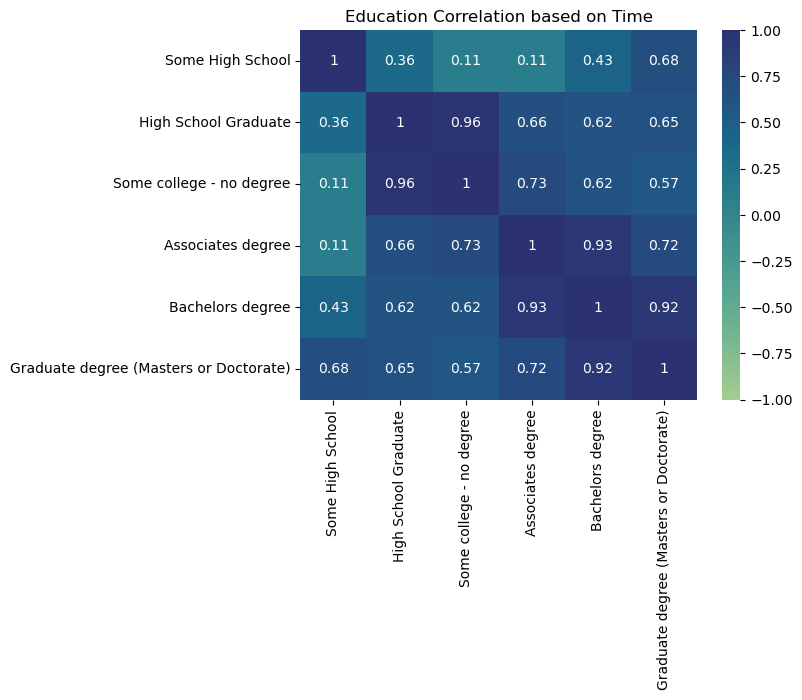

In [283]:
# Calculate and visualize correlation of education across different times of day for carryout coupon receivers
variable = 'education'
class1 = 'Some High School'
class2 = 'High School Graduate'
class3 = 'Some college - no degree'
class4 = 'Associates degree'
class5 = 'Bachelors degree'
class6 = 'Graduate degree (Masters or Doctorate)'

lv1 = accept_rate(df=carryout,var1=variable,var2='time',var_class=class1,accept='y')
lv2 = accept_rate(df=carryout,var1=variable,var2='time',var_class=class2,accept='y')
lv3 = accept_rate(df=carryout,var1=variable,var2='time',var_class=class3,accept='y')
lv4 = accept_rate(df=carryout,var1=variable,var2='time',var_class=class4,accept='y')
lv5 = accept_rate(df=carryout,var1=variable,var2='time',var_class=class5,accept='y')
lv6 = accept_rate(df=carryout,var1=variable,var2='time',var_class=class6,accept='y')

time_edu_acceptance = unite_series([lv1,lv2,lv3,lv4,lv5,lv6],[class1,class2,class3,class4,class5,class6])
time_edu_acceptance = time_edu_acceptance.reindex(['7AM', '10AM', '2PM', '6PM', '10PM'])

# Generate heatmap of correlations and edit figure for human readability
fig = sns.heatmap(time_edu_acceptance.corr(),cmap='crest',annot=True,vmin=-1,vmax=1) #title='Education Correlation based on Time'
fig.set_title('Education Correlation based on Time')

- All correlations are varying degrees of positive, meaning that all education groups tend to accept more coupons as the day passes
- Acceptance rates between "some high school" correlate the least with the rest of the groups
- This suggests that the increase in acceptance rate is not as great for the "some high school" group
- Could be because of greater consistency in the acceptance rate for the "some high school" group

Text(0.5, 1.0, 'Age Correlation based on Income')

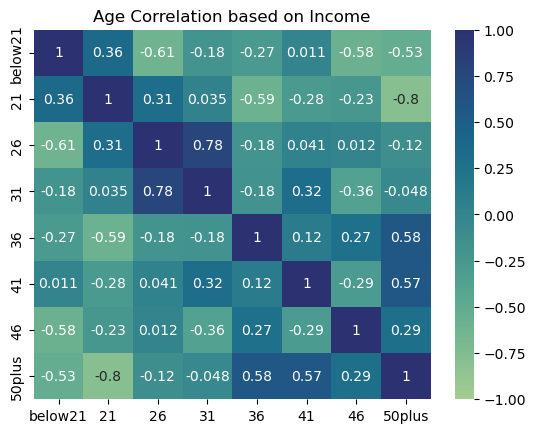

In [212]:
# Calculate and visualize correlation of age based on income
variable = 'age'
class1 = 'below21'
class2 = '21'
class3 = '26'
class4 = '31'
class5 = '36'
class6 = '41'
class7 = '46'
class8 = '50plus'

lv1 = accept_rate(df=carryout,var1=variable,var2='income',var_class=class1,accept='y')
lv2 = accept_rate(df=carryout,var1=variable,var2='income',var_class=class2,accept='y')
lv3 = accept_rate(df=carryout,var1=variable,var2='income',var_class=class3,accept='y')
lv4 = accept_rate(df=carryout,var1=variable,var2='income',var_class=class4,accept='y')
lv5 = accept_rate(df=carryout,var1=variable,var2='income',var_class=class5,accept='y')
lv6 = accept_rate(df=carryout,var1=variable,var2='income',var_class=class6,accept='y')
lv7 = accept_rate(df=carryout,var1=variable,var2='income',var_class=class7,accept='y')
lv8 = accept_rate(df=carryout,var1=variable,var2='income',var_class=class8,accept='y')

income_age_acceptance = unite_series([lv1,lv2,lv3,lv4,lv5,lv6,lv7,lv8],[class1,class2,class3,class4,class5,class6,class7,class8])

# Here the new data frame gets reordered for simplicity of interpretation, as well as renamed to facilitate human readability
income_age_acceptance = income_age_acceptance.reindex(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999',
                                                             '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999',
                                                             '$100000 or More'])
income_age_acceptance = income_age_acceptance.rename({'$12500 - $24999': '\$12500 - $24999', '$25000 - $37499': '\$25000 - $37499',
                                                            '$37500 - $49999': '\$37500 - $49999', '$50000 - $62499': '\$50000 - $62499',
                                                            '$62500 - $74999': '\$62500 - $74999', '$75000 - $87499': '\$75000 - $87499',
                                                            '$87500 - $99999': '\$87500 - $99999'})

# Generate heatmap of correlations and edit figure for human readability
fig = sns.heatmap(income_age_acceptance.corr(),cmap='crest',vmin=-1,vmax=1,annot=True)
fig.set_title('Age Correlation based on Income')

- The overwhelming majority of correlations are small values that balance around 0 (no correlation)
- This means that the increase in acceptance rate as income increases is disimilar between most age groups
- Nevertheless, 26 and 31 have a strong positive corelation
- Lower ages have a strongly negative correlation with the greatest ages
- Greater ages have a strong positive correlation with the greater subset of ages

Text(0.5, 1.0, 'Income Correlation based on Age')

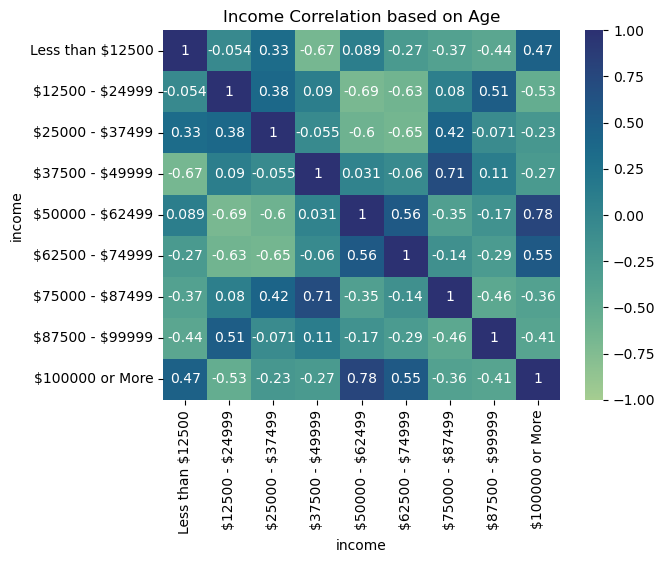

In [234]:
## The results of age correlations based on income are informative but can also be inverted to provide additional significance

# Generate heatmap of correlations and edit figure for human readability (transpose table to invert the correlated variable)
fig = sns.heatmap(income_age_acceptance.T.corr(),cmap='crest',vmin=-1,vmax=1,annot=True)
fig.set_title('Income Correlation based on Age')

- As customers increase in age, the acceptance rates of higher income groups decrease while others have proportionate increases in acceptance rate
- Low income groups have positive correlation between each other, and some low income groups have high correlation with the highest income groups
- High income groups have a generally negative correlations between each other
- The negative correlations between lower and middle income ranges are generally the strongest observed correlations

Text(0.5, 1.0, 'Destination Correlations based on Carryout Frequency')

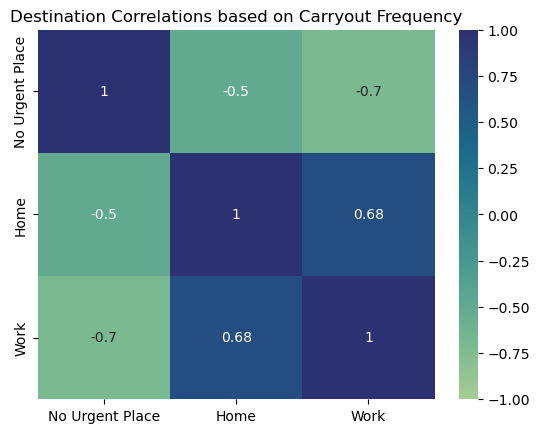

In [285]:
# Calculate and visualize correlation of destination based on frequency of carryout orders
#    Destinations are organized in an ordered manner based on increasing "urgency": No Urgent Place < Home < Work
variable = 'destination'
class1 = 'No Urgent Place'
class2 = 'Home'
class3 = 'Work'

lv1 = accept_rate(df=carryout,var1=variable,var2='carryaway',var_class=class1,accept='y')
lv2 = accept_rate(df=carryout,var1=variable,var2='carryaway',var_class=class2,accept='y')
lv3 = accept_rate(df=carryout,var1=variable,var2='carryaway',var_class=class3,accept='y')

freqcarry_dest_acceptance = unite_series([lv1,lv2,lv3],[class1,class2,class3])
freqcarry_dest_acceptance = freqcarry_dest_acceptance.reindex(['never','less1','1~3','4~8','gt8'])

# Generate heatmap of correlations and edit figure for human readability
fig = sns.heatmap(freqcarry_dest_acceptance.corr(),cmap='crest',vmin=-1,vmax=1,annot=True)
fig.set_title('Destination Correlations based on Carryout Frequency')

- The correlation between "no urgent destination" and the other destinations is strongly negative, meaning that as the frequency of carryout increases, the likelihood of coupon acceptance increases for "No urgent place" as compared to a decrease when "Home" or "Work" are the destination
- The increase in acceptance rate as frequency of carryout increases is similar for "Home" and "Work" as destinations

Text(0.5, 1.0, 'Carryout Frequency Correlation based on Destination Urgency')

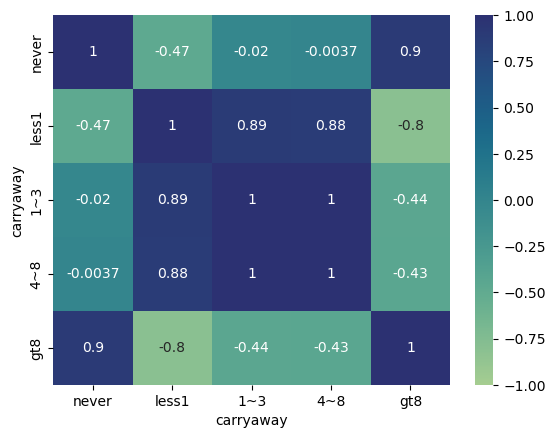

In [260]:
## The results of destination correlations based on frequency of carryout can also be inverted to provide additional significance

# Generate heatmap of correlations and edit figure for human readability (transpose table to invert the correlated variable)
sns.heatmap(freqcarry_dest_acceptance.T.corr(),cmap='crest',annot=True,vmin=-1,vmax=1)
fig.set_title('Carryout Frequency Correlation based on Destination Urgency')

- There is a large correlation between the increase in acceptance rate based on increased urgency for people who never order carryout and people who order the greatest amount of carryout
- Middle range of frequency has extremely similar increases in acceptance rate as urgency increases
- The most extreme frequencies (never and greater than 8) have negative correlations with middle range frequencies, meaning that acceptance rates decrease for middle range as acceptance rates increases for extreme frequencies as the urgency of the destination increases

# **FINAL FINDINGS**

### **PROBLEM STATEMENT: What variables demonstrate changes in acceptance rates related to carryout coupons, and what is the effect they have?**  
*Carryout coupons analyzed due to their representative proportion and high/consistent acceptance rate*
- The acceptance rate for carryout coupons is larger than for any other group, with a value over 70%
- Carryout coupons have the highest acceptance rate across all education and income groups, serving as a good candidate for further study

1) Widows and divorcees have a higher rate of accepting carryout coupons than other marital statuses
2) Carryout coupons are largely accepted by most people regardless of demographics and location where coupon was received
3) Coupons are increasingly accepted through the course of the day, regardless of education level
4) Acceptance rates based on income groups are extremely disimilar between the youngest ages and the oldest ages
5) Older individuals have similar rates of acceptance, indicating a certain degree of consistency
6) Low income groups have similar acceptance rates across ages compared to some low income groups, as well as the highest income groups
7) High income groups have negative correlation across ages, meaning that depending on the level of wealth, different ages take distinct stances on accepting carryout coupons
8) The greater the frequency of ordering carryout, the greater the increase in acceptance rate when there is no urgent destination
9) As people visit carryout restaurants more frequently, the acceptance rate decreases when there is an urgent destination (habituation)

#### **Action Steps**
1) Carryout coupons have a greater acceptance rate when the customers do not order carryout too frequently or too infrequently
2) Targeting divorcees and widows could be a way to increase sales
3) Income, education and age do not demonstrate a clear relationship with changes in acceptance rate, consider further sampling for clarification

# EXTRA CALCULATIONS

***Difficult to interpret correlations***

Text(0.5, 1.0, 'Correlation of Bar Visits based on Frequency of Cheap Restaurant Visits')

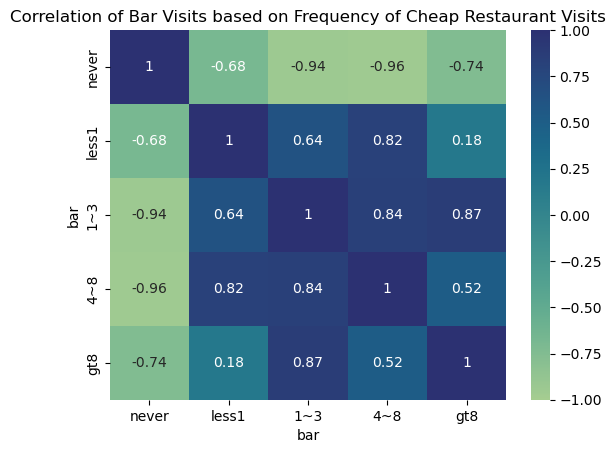

In [241]:
# Calculate and visualize correlation of frequenting bars based on the frequency of visits to cheap restaurants
# Since cheap restaurants were frequented much more than bars, it serves as a good basis for correlating frequency of bar visits
variable = 'restaurantlessthan20'

class1 = 'never'
class2 = 'less1'
class3 = '1~3'
class4 = '4~8'
class5 = 'gt8'

lv1 = accept_rate(df=carryout,var1=variable,var2='bar',var_class=class1,accept='y')
lv2 = accept_rate(df=carryout,var1=variable,var2='bar',var_class=class2,accept='y')
lv3 = accept_rate(df=carryout,var1=variable,var2='bar',var_class=class3,accept='y')
lv4 = accept_rate(df=carryout,var1=variable,var2='bar',var_class=class4,accept='y')
lv5 = accept_rate(df=carryout,var1=variable,var2='bar',var_class=class5,accept='y')

freqcheap_freqbar_acceptance = pd.DataFrame({class1: lv1, class2: lv2, class3: lv3, class4: lv4, class5: lv5})
freqcheap_freqbar_acceptance = freqcheap_freqbar_acceptance.reindex(['never','less1','1~3','4~8','gt8'])
freqcheap_freqbar_acceptance = freqcheap_freqbar_acceptance.iloc[:,1:]

# Generate heatmap of correlations and edit figure for human readability
fig = sns.heatmap(freqcheap_freqbar_acceptance.T.corr(),cmap='crest',annot=True,vmin=-1,vmax=1)
fig.set_title('Correlation of Bar Visits based on Frequency of Cheap Restaurant Visits')

- Never visiting a bar has a decreasing acceptance rate of carryout coupons as people visit cheap restaurants more frequently
- All other bar visit frequencies are strongly positively correlated, meaning that carryout coupons are being accepted more frequently as people increase their monthly visits to cheap restaurants, for people who go to a bar at least once

## Conclusions from single variable comparisons to coupon type

**Destination**
- All coupon types are most likely to be accepted with no urgent destination
- Bar and carryout are even more likely to be accepted when going home


**Passenger**
- Being with a friend gives the highest chance of accepting any coupon, except for expensive restaurants (which are most likely when with a partner)


**Weather**
- People most likely to accept coupons on a sunny day, and generally least likely on snowy days


**Temperature**
- The acceptance of coffee house and all restaurant coupons increases with temperature
- Carryout most likely in coldest temperature


**Time**
- Carryout most likely in afternoon/evening
- Bar most likely in evening/night
- Coffeehouse most likely in the morning
- Cheap restaurant most likely in afternoon/evening


**Expiration**
- Acceptance of all types increases with longer expiration period
- Bar has the least different between different expiration times


**Gender**
- Females are less likely to accept coupons across all types
- Males accept bar coupons much more than females
- Coffeehouse has the most similar acceptance rate


**Age**
- 21 year olds are most likely to accept bar coupons
- Carryout highly accepted in a consistent manner across all ages
- Coffeehouse most likely to be accepted by below 21-year olds


**Marital Status**
- Single people accept bar coupons far more frequently
- Widowed individuals accept carry out coupons the most frequently, and accept coffeehouse and all restaurant coupons the least of all groups
- Divorced individuals accept restaurant coupons notably less than the other groups excepting widows


**Has Children**
- Presence of kids makes generally small differences except for accepting bar coupons
- Expensive restaurants are also accepted markedly more without children


**Education**
- Some high school education is most likely to accept bar coupons of all types
- Cheap restaurants have the most consistent rate across education groups


**Occupation**
- **Hard to make judgements due to volume of distinct professions**


**Income**
- Below poverty line (<$25000), carryout is the most likely coupon type to be accepted
- The poorest and richest income brackets are most likely to accept bar coupons
- The lowest three income brackets are more likely to accept carryout coupons than the highest 3 income brackets


**Frequency of Bar Visits**
- While all other bar visit groups maintain a consistent quantity of carryout coupon acceptance, more than 8 bar visits a month have 20% less carryout coupon acceptance
- Bar coupon acceptance generally increases with average number of bar visits in a month
- 8+ visits to a bar a month has the greatest chance of accepting expensive restaurant coupons


**Frequency of Coffeehouse Visits**
- Accepting a bar coupon was more likely for people who went to a coffeehouse 1+ times a month
- People who visit a coffeehouse 8+ times in a month are the least likely to accept a cheap restaurant coupon
- Carryout is very consistent across all visit categories with the exception of the 8+ category


**Frequency of Carryaway**
- Almost all visit types accept the carryout coupons at an extremely consistent rate
- Bar coupons were more likely to be accepted as the amount of carryout instances increased in a month
- Carryout less than once a month group is the least likely to accept any type of coupon


**Frequency Cheap Restaurant**
- More visits to cheaper restaurants correlates with a higher acceptance rate for expensive restaurant and coffeehouse coupons
- People who never go to cheap restaurants have the highest likelihood of accepting carryout coupons of all types
- People who never go to cheap restaurants have the greatest likelihood of accepting bar coupons as opposed to those who visit cheap restaurants


**Frequency Expensive Restaurant**
- More visits to expensive restaurants corresponds to greater likelihood of accepting bar and coffeehouse coupons
- Acceptance rate of cheap restaurant coupons relatively constant regardless of number of visits to expensive restaurants in a single month
- Carryout coupons accepted at a very high rate with the exception of 8+ visits to expensive restaurants per month


**Direction**
- Bar, coffeehouse, and expensive restaurant coupons are more likely to be accepted if in the same direction
- Carryout and cheap restaurant coupons are more likely to be accepted if in the opposite direction


**Distance**
- Bar and coffeehouse coupons are more likely to be accepted the nearer they are
- Carryout and expensive restaurant coupons are essentially equally likely to be accepted regardless of distance

In [87]:
variable = 'destination'
print(data[variable].unique())
data.groupby([variable,'coupon'])['y'].sum()/data.groupby([variable,'coupon'])['y'].count()
# All coupon types are most likely to be accepted with no urgent destination
# Bar and carryout are even more likely to be accepted when going home

class1 = 'No Urgent Place'
class2 = 'Home'
class3 = 'Work'

lv1 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class1,accept='y')
lv2 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class2,accept='y')
lv3 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class3,accept='y')

#df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['DATE'],how='outer'), data_frames)

lv12 = pd.merge(left=lv1,right=lv2,left_on='coupon',right_on='coupon')
dest_coupon_acceptance = pd.merge(left=lv12,right=lv3,left_on='coupon',right_on='coupon')
dest_coupon_acceptance = dest_coupon_acceptance.rename({'y_x': class1, 'y_y': class2, 'y': class3},axis=1)

dest_coupon_acceptance.head(10)

['No Urgent Place' 'Home' 'Work']


,No Urgent Place,Home,Work
coupon,,,
Bar,0.412863,0.452083,0.367965
Carry out & Take away,0.760518,0.791262,0.652616
Coffee House,0.577148,0.362302,0.440000
Restaurant(20-50),0.502577,0.439222,0.404412
Restaurant(<20),0.794588,0.557652,0.589319


In [88]:
variable = 'passenger'
print(data[variable].unique())
data.groupby([variable,'coupon'])['y'].sum()/data.groupby([variable,'coupon'])['y'].count()
# Being with a friend gives the highest chance of accepting any coupon, 
#          except for expensive restaurants (which are most likely when with a partner)

class1 = 'Alone'
class2 = 'Kid'
class3 = 'Partner'
class4 = 'Friend'

lv1 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class1,accept='y')
lv2 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class2,accept='y')
lv3 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class3,accept='y')
lv4 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class4,accept='y')

lv12 = pd.merge(left=lv1,right=lv2,left_on='coupon',right_on='coupon')
lv34 = pd.merge(left=lv3,right=lv4,left_on='coupon',right_on='coupon')
pass_coupon_acceptance = pd.merge(left=lv12,right=lv34,left_on='coupon',right_on='coupon')
pass_coupon_acceptance = pass_coupon_acceptance.rename({'y_x_x': class1, 'y_y_x': class2, 'y_x_y': class3, 'y_y_y': class4},axis=1)

pass_coupon_acceptance.head(10)

['Alone' 'Friend' 'Kid' 'Partner']


,Alone,Kid,Partner,Friend
coupon,,,,
Bar,0.409131,0.208333,0.386100,0.566456
Carry out & Take away,0.729375,0.695035,0.711111,0.758865
Coffee House,0.433612,0.468750,0.565517,0.596760
Restaurant(20-50),0.429614,0.364780,0.625000,0.477987
Restaurant(<20),0.641758,0.710843,0.786008,0.803549


In [89]:
variable = 'weather'
print(data[variable].unique())
data.groupby([variable,'coupon'])['y'].sum()/data.groupby([variable,'coupon'])['y'].count()
# People most likely to accept coupons on a sunny day, and generally least likely on snowy days

class1 = 'Sunny'
class2 = 'Rainy'
class3 = 'Snowy'

lv1 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class1,accept='y')
lv2 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class2,accept='y')
lv3 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class3,accept='y')

lv12 = pd.merge(left=lv1,right=lv2,left_on='coupon',right_on='coupon')
weath_coupon_acceptance = pd.merge(left=lv12,right=lv3,left_on='coupon',right_on='coupon')
weath_coupon_acceptance = weath_coupon_acceptance.rename({'y_x': class1, 'y_y': class2, 'y': class3},axis=1)

weath_coupon_acceptance.head(10)

['Sunny' 'Rainy' 'Snowy']


,Sunny,Rainy,Snowy
coupon,,,
Bar,0.442790,0.362963,0.324444
Carry out & Take away,0.762774,0.608696,0.713793
Coffee House,0.500000,0.516279,0.429577
Restaurant(20-50),0.468697,0.380952,0.315476
Restaurant(<20),0.767932,0.401274,0.497191


In [90]:
variable = 'temperature'
print(data[variable].unique())
data.groupby([variable,'coupon'])['y'].sum()/data.groupby([variable,'coupon'])['y'].count()
# The acceptance of coffee house and all restaurant coupons increases with temperature
# Carryout most likely in coldest temperature

class1 = 30
class2 = 55
class3 = 80

lv1 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class1,accept='y')
lv2 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class2,accept='y')
lv3 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class3,accept='y')

temp_coupon_acceptance = pd.merge(left=lv1,right=lv2,left_on='coupon',right_on='coupon')
temp_coupon_acceptance = pd.merge(left=temp_coupon_acceptance,right=lv3,left_on='coupon',right_on='coupon')
temp_coupon_acceptance = temp_coupon_acceptance.rename({'y_x': '30', 'y_y': '55','y': '80'},axis=1)

temp_coupon_acceptance.head(10)

[55 80 30]


,30,55,80
coupon,,,
Bar,0.329146,0.449451,0.409699
Carry out & Take away,0.759155,0.719780,0.727738
Coffee House,0.442953,0.451109,0.526155
Restaurant(20-50),0.355469,0.427350,0.483871
Restaurant(<20),0.538314,0.734076,0.759358


In [91]:
variable = 'time'
print(data[variable].unique())
data.groupby([variable,'coupon'])['y'].sum()/data.groupby([variable,'coupon'])['y'].count()
# Carryout most likely in afternoon/evening
# Bar most likely in evening/night
# Coffeehouse most likely in the morning
# Cheap restaurant most likely in afternoon/evening

class1 = '7AM'
class2 = '10AM'
class3 = '2PM'
class4 = '6PM'
class5 = '10PM'

lv1 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class1,accept='y')
lv2 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class2,accept='y')
lv3 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class3,accept='y')
lv4 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class4,accept='y')
lv5 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class5,accept='y')

lv12 = pd.merge(left=lv1,right=lv2,left_on='coupon',right_on='coupon')
lv123 = pd.merge(left=lv12,right=lv3,left_on='coupon',right_on='coupon')
lv45 = pd.merge(left=lv4,right=lv5,left_on='coupon',right_on='coupon')
time_coupon_acceptance = pd.merge(left=lv123,right=lv45,left_on='coupon',right_on='coupon')
time_coupon_acceptance = time_coupon_acceptance.rename({'y_x_x': class1, 'y_y_x': class2, 'y': class3, 'y_x_y': class4,'y_y_y': class5},axis=1)

time_coupon_acceptance.head(10)

['2PM' '10AM' '6PM' '7AM' '10PM']


,7AM,10AM,2PM,6PM,10PM
coupon,,,,,
Bar,0.367965,0.367788,0.336283,0.462687,0.464380
Carry out & Take away,0.652616,0.698770,0.866029,0.819951,0.766590
Coffee House,0.440000,0.634346,0.544855,0.410405,0.429078
Restaurant(20-50),0.404412,0.607477,0.545977,0.502717,0.339888
Restaurant(<20),0.589319,0.717770,0.814871,0.826573,0.506787


In [92]:
variable = 'expiration'
print(data[variable].unique())
data.groupby([variable,'coupon'])['y'].sum()/data.groupby([variable,'coupon'])['y'].count()
# Acceptance of all types increases with longer expiration period
# Bar has the least different between different expiration times

class1 = '2h'
class2 = '1d'

lv1 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class1,accept='y')
lv2 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class2,accept='y')

expiry_coupon_acceptance = pd.merge(left=lv1,right=lv2,left_on='coupon',right_on='coupon')
expiry_coupon_acceptance = expiry_coupon_acceptance.rename({'y_x': '2h', 'y_y': '1d'},axis=1)

expiry_coupon_acceptance.head(10)

['1d' '2h']


,2h,1d
coupon,,
Bar,0.399538,0.415479
Carry out & Take away,0.661400,0.784707
Coffee House,0.428841,0.579727
Restaurant(20-50),0.307692,0.524283
Restaurant(<20),0.590273,0.835531


In [93]:
variable = 'gender'
print(data[variable].unique())
data.groupby([variable,'coupon'])['y'].sum()/data.groupby([variable,'coupon'])['y'].count()
# Females are less likely to accept coupons across all types
# Males accept bar coupons much more than females
# Coffeehouse has the most similar acceptance rate

class1 = 'Female'
class2 = 'Male'

lv1 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class1,accept='y')
lv2 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class2,accept='y')

gender_coupon_acceptance = pd.merge(left=lv1,right=lv2,left_on='coupon',right_on='coupon')
gender_coupon_acceptance = gender_coupon_acceptance.rename({'y_x': 'Female', 'y_y': 'Male'},axis=1)

gender_coupon_acceptance.head()

['Male' 'Female']


,Female,Male
coupon,,
Bar,0.341759,0.487459
Carry out & Take away,0.713415,0.759447
Coffee House,0.490336,0.501356
Restaurant(20-50),0.428973,0.464387
Restaurant(<20),0.699405,0.720430


In [94]:
variable = 'age'
print(data[variable].unique())
data.groupby([variable,'coupon'])['y'].sum()/data.groupby([variable,'coupon'])['y'].count()
# 21 year olds are most likely to accept bar coupons
# Carryout highly accepted in a consistent manner across all ages
# Coffeehouse most likely to be accepted by below 21-year olds

class1 = 'below21'
class2 = '21'
class3 = '26'
class4 = '31'
class5 = '36'
class6 = '41'
class7 = '46'
class8 = '50plus'

lv1 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class1,accept='y')
lv2 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class2,accept='y')
lv3 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class3,accept='y')
lv4 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class4,accept='y')
lv5 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class5,accept='y')
lv6 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class6,accept='y')
lv7 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class7,accept='y')
lv8 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class8,accept='y')

lv12 = pd.merge(left=lv1,right=lv2,left_on='coupon',right_on='coupon')
lv12 = lv12.rename({'y_x': class1, 'y_y': class2},axis=1)
lv34 = pd.merge(left=lv3,right=lv4,left_on='coupon',right_on='coupon')
lv34 = lv34.rename({'y_x': class3, 'y_y': class4},axis=1)
lv1234 = pd.merge(left=lv12,right=lv34,left_on='coupon',right_on='coupon')
lv56 = pd.merge(left=lv5,right=lv6,left_on='coupon',right_on='coupon')
lv56 = lv56.rename({'y_x': class5, 'y_y': class6},axis=1)
lv78 = pd.merge(left=lv7,right=lv8,left_on='coupon',right_on='coupon')
lv78 = lv78.rename({'y_x': class7, 'y_y': class8},axis=1)
lv5678 = pd.merge(left=lv56,right=lv78,left_on='coupon',right_on='coupon')
age_coupon_acceptance = pd.merge(left=lv1234,right=lv5678,left_on='coupon',right_on='coupon')

age_coupon_acceptance.head(10)

['21' '46' '26' '31' '41' '50plus' '36' 'below21']


,below21,21,26,31,36,41,46,50plus
coupon,,,,,,,,
Bar,0.419753,0.503778,0.486413,0.376947,0.306122,0.438596,0.363636,0.293040
Carry out & Take away,0.715686,0.740659,0.734884,0.714286,0.746835,0.730000,0.709402,0.765244
Coffee House,0.678322,0.517773,0.513174,0.481164,0.468586,0.492114,0.502347,0.419660
Restaurant(20-50),0.448276,0.429577,0.514815,0.424107,0.490323,0.446154,0.506494,0.353488
Restaurant(<20),0.737288,0.738095,0.741874,0.711864,0.647687,0.716049,0.753521,0.639474


In [95]:
variable = 'maritalstatus'
print(data[variable].unique())
data.groupby([variable,'coupon'])['y'].sum()/data.groupby([variable,'coupon'])['y'].count()
# Single people accept bar coupons far more frequently
# Widowed individuals accept carry out coupons the most frequently, and accept coffeehouse and all restaurant coupons the least of all groups
# Divorced individuals accept restaurant coupons notably less than the other groups excepting widows

class1 = 'Single'
class2 = 'Married partner'
class3 = 'Unmarried partner'
class4 = 'Divorced'
class5 = 'Widowed'

lv1 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class1,accept='y')
lv2 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class2,accept='y')
lv3 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class3,accept='y')
lv4 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class4,accept='y')
lv5 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class5,accept='y')

lv12 = pd.merge(left=lv1,right=lv2,left_on='coupon',right_on='coupon')
lv123 = pd.merge(left=lv12,right=lv3,left_on='coupon',right_on='coupon')
lv45 = pd.merge(left=lv4,right=lv5,left_on='coupon',right_on='coupon')
marstat_coupon_acceptance = pd.merge(left=lv123,right=lv45,left_on='coupon',right_on='coupon')
marstat_coupon_acceptance = marstat_coupon_acceptance.rename({'y_x_x': 'Single', 'y_y_x': 'Married partner','y': 'Unmarried partner', 'y_x_y': 'Divorced','y_y_y': 'Widowed'},axis=1)

marstat_coupon_acceptance.head(10)

['Single' 'Married partner' 'Unmarried partner' 'Divorced' 'Widowed']


,Single,Married partner,Unmarried partner,Divorced,Widowed
coupon,,,,,
Bar,0.553292,0.324455,0.397727,0.232877,0.411765
Carry out & Take away,0.755814,0.727170,0.707989,0.718447,0.850000
Coffee House,0.514362,0.489376,0.470414,0.517483,0.352941
Restaurant(20-50),0.473684,0.426829,0.471698,0.354839,0.214286
Restaurant(<20),0.733135,0.694207,0.725225,0.627119,0.521739


In [96]:
variable = 'has_children'
print(data[variable].unique())
data.groupby([variable,'coupon'])['y'].sum()/data.groupby([variable,'coupon'])['y'].count()
# Presence of kids makes generally small differences except for accepting bar coupons
# Expensive restaurants are also accepted markedly more without children

class1 = 1
class2 = 0

lv1 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class1,accept='y')
lv2 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class2,accept='y')

child_coupon_acceptance = pd.merge(left=lv1,right=lv2,left_on='coupon',right_on='coupon')
child_coupon_acceptance = child_coupon_acceptance.rename({'y_x': 'Kids', 'y_y': 'No Kids'},axis=1)

child_coupon_acceptance.head(10)

[0 1]


,Kids,No Kids
coupon,,
Bar,0.296069,0.498168
Carry out & Take away,0.738445,0.733802
Coffee House,0.486915,0.501061
Restaurant(20-50),0.407529,0.476309
Restaurant(<20),0.694444,0.720307


In [97]:
variable = 'education'
print(data[variable].unique())
data.groupby([variable,'coupon'])['y'].sum()/data.groupby([variable,'coupon'])['y'].count()
# Some high school education is most likely to accept bar coupons of all types
# Cheap restaurants have the most consistent rate across education groups

class1 = 'Some High School'
class2 = 'High School Graduate'
class3 = 'Some college - no degree'
class4 = 'Associates degree'
class5 = 'Bachelors degree'
class6 = 'Graduate degree (Masters or Doctorate)'

lv1 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class1,accept='y')
lv2 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class2,accept='y')
lv3 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class3,accept='y')
lv4 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class4,accept='y')
lv5 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class5,accept='y')
lv6 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class6,accept='y')


lv12 = pd.merge(left=lv1,right=lv2,left_on='coupon',right_on='coupon')
lv12 = lv12.rename({'y_x': class1, 'y_y': class2},axis=1)
lv34 = pd.merge(left=lv3,right=lv4,left_on='coupon',right_on='coupon')
lv34 = lv34.rename({'y_x': class3, 'y_y': class4},axis=1)
lv56 = pd.merge(left=lv5,right=lv6,left_on='coupon',right_on='coupon')
lv56 = lv56.rename({'y_x': class5, 'y_y': class6},axis=1)
lv1234 = pd.merge(left=lv12,right=lv34,left_on='coupon',right_on='coupon')
education_coupon_acceptance = pd.merge(left=lv1234,right=lv56,left_on='coupon',right_on='coupon')

education_coupon_acceptance.head()

['Bachelors degree' 'Some college - no degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']


,Some High School,High School Graduate,Some college - no degree,Associates degree,Bachelors degree,Graduate degree (Masters or Doctorate)
coupon,,,,,,
Bar,0.785714,0.405594,0.448023,0.299435,0.415214,0.368217
Carry out & Take away,0.937500,0.745562,0.758755,0.832487,0.721400,0.643917
Coffee House,0.607143,0.540441,0.513208,0.513846,0.456113,0.506003
Restaurant(20-50),0.583333,0.524752,0.475207,0.443662,0.426778,0.377551
Restaurant(<20),0.722222,0.715054,0.741139,0.659091,0.731293,0.616137


##### Occupation

In [99]:
variable = 'occupation'
uniq = np.sort(data[variable].unique())
data.groupby([variable,'coupon'])['y'].sum()/data.groupby([variable,'coupon'])['y'].count()
# ---

# Prepare data frames for merging
lv1 = accept_rate(df=data,var1=variable,var2='coupon',var_class=uniq[0],accept='y')
lv2 = accept_rate(df=data,var1=variable,var2='coupon',var_class=uniq[1],accept='y')
lv3 = accept_rate(df=data,var1=variable,var2='coupon',var_class=uniq[2],accept='y')
lv4 = accept_rate(df=data,var1=variable,var2='coupon',var_class=uniq[3],accept='y')
lv5 = accept_rate(df=data,var1=variable,var2='coupon',var_class=uniq[4],accept='y')
lv6 = accept_rate(df=data,var1=variable,var2='coupon',var_class=uniq[5],accept='y')
lv7 = accept_rate(df=data,var1=variable,var2='coupon',var_class=uniq[6],accept='y')
lv8 = accept_rate(df=data,var1=variable,var2='coupon',var_class=uniq[7],accept='y')
lv9 = accept_rate(df=data,var1=variable,var2='coupon',var_class=uniq[8],accept='y')
lv10 = accept_rate(df=data,var1=variable,var2='coupon',var_class=uniq[9],accept='y')
lv11 = accept_rate(df=data,var1=variable,var2='coupon',var_class=uniq[10],accept='y')
lv12 = accept_rate(df=data,var1=variable,var2='coupon',var_class=uniq[11],accept='y')
lv13 = accept_rate(df=data,var1=variable,var2='coupon',var_class=uniq[12],accept='y')
lv14 = accept_rate(df=data,var1=variable,var2='coupon',var_class=uniq[13],accept='y')
lv15 = accept_rate(df=data,var1=variable,var2='coupon',var_class=uniq[14],accept='y')
lv16 = accept_rate(df=data,var1=variable,var2='coupon',var_class=uniq[15],accept='y')
lv17 = accept_rate(df=data,var1=variable,var2='coupon',var_class=uniq[16],accept='y')
lv18 = accept_rate(df=data,var1=variable,var2='coupon',var_class=uniq[17],accept='y')
lv19 = accept_rate(df=data,var1=variable,var2='coupon',var_class=uniq[18],accept='y')
lv20 = accept_rate(df=data,var1=variable,var2='coupon',var_class=uniq[19],accept='y')
lv21 = accept_rate(df=data,var1=variable,var2='coupon',var_class=uniq[20],accept='y')
lv22 = accept_rate(df=data,var1=variable,var2='coupon',var_class=uniq[21],accept='y')
lv23 = accept_rate(df=data,var1=variable,var2='coupon',var_class=uniq[22],accept='y')
lv24 = accept_rate(df=data,var1=variable,var2='coupon',var_class=uniq[23],accept='y')
lv25 = accept_rate(df=data,var1=variable,var2='coupon',var_class=uniq[24],accept='y')

# Creating 5 partitioned merges of the 25 occupations
lv1_2 = pd.merge(left=lv1,right=lv2,left_on='coupon',right_on='coupon')
lv1_2_3 = pd.merge(left=lv1_2,right=lv3,left_on='coupon',right_on='coupon')
lv1_2_3 = lv1_2_3.rename({'y_x': uniq[0], 'y_y': uniq[1], 'y': uniq[2]},axis=1)
lv4_5 = pd.merge(left=lv4,right=lv5,left_on='coupon',right_on='coupon')
lv4_5 = lv4_5.rename({'y_x': uniq[3], 'y_y': uniq[4]},axis=1)
occ_coupon_1 = pd.merge(left=lv1_2_3,right=lv4_5,left_on='coupon',right_on='coupon')

lv1_2 = pd.merge(left=lv6,right=lv7,left_on='coupon',right_on='coupon')
lv1_2_3 = pd.merge(left=lv1_2,right=lv8,left_on='coupon',right_on='coupon')
lv1_2_3 = lv1_2_3.rename({'y_x': uniq[5], 'y_y': uniq[6], 'y': uniq[7]},axis=1)
lv4_5 = pd.merge(left=lv9,right=lv10,left_on='coupon',right_on='coupon')
lv4_5 = lv4_5.rename({'y_x': uniq[8], 'y_y': uniq[9]},axis=1)
occ_coupon_2 = pd.merge(left=lv1_2_3,right=lv4_5,left_on='coupon',right_on='coupon')

lv1_2 = pd.merge(left=lv11,right=lv12,left_on='coupon',right_on='coupon')
lv1_2_3 = pd.merge(left=lv1_2,right=lv13,left_on='coupon',right_on='coupon')
lv1_2_3 = lv1_2_3.rename({'y_x': uniq[10], 'y_y': uniq[11], 'y': uniq[12]},axis=1)
lv4_5 = pd.merge(left=lv14,right=lv15,left_on='coupon',right_on='coupon')
lv4_5 = lv4_5.rename({'y_x': uniq[13], 'y_y': uniq[14]},axis=1)
occ_coupon_3 = pd.merge(left=lv1_2_3,right=lv4_5,left_on='coupon',right_on='coupon')

lv1_2 = pd.merge(left=lv16,right=lv17,left_on='coupon',right_on='coupon')
lv1_2_3 = pd.merge(left=lv1_2,right=lv18,left_on='coupon',right_on='coupon')
lv1_2_3 = lv1_2_3.rename({'y_x': uniq[15], 'y_y': uniq[16], 'y': uniq[17]},axis=1)
lv4_5 = pd.merge(left=lv19,right=lv20,left_on='coupon',right_on='coupon')
lv4_5 = lv4_5.rename({'y_x': uniq[18], 'y_y': uniq[19]},axis=1)
occ_coupon_4 = pd.merge(left=lv1_2_3,right=lv4_5,left_on='coupon',right_on='coupon')

lv1_2 = pd.merge(left=lv21,right=lv22,left_on='coupon',right_on='coupon')
lv1_2_3 = pd.merge(left=lv1_2,right=lv23,left_on='coupon',right_on='coupon')
lv1_2_3 = lv1_2_3.rename({'y_x': uniq[20], 'y_y': uniq[21], 'y': uniq[22]},axis=1)
lv4_5 = pd.merge(left=lv24,right=lv25,left_on='coupon',right_on='coupon')
lv4_5 = lv4_5.rename({'y_x': uniq[23], 'y_y': uniq[24]},axis=1)
occ_coupon_5 = pd.merge(left=lv1_2_3,right=lv4_5,left_on='coupon',right_on='coupon')

# Merging the 5 partitioned tables
occ1_2 = pd.merge(left=occ_coupon_1,right=occ_coupon_2,left_on='coupon',right_on='coupon')
occ1_2_3 = pd.merge(left=occ1_2,right=occ_coupon_3,left_on='coupon',right_on='coupon')
occ4_5 = pd.merge(left=occ_coupon_4,right=occ_coupon_5,left_on='coupon',right_on='coupon')
occ_coupon_acceptance = pd.merge(left=occ1_2_3,right=occ4_5,left_on='coupon',right_on='coupon')

#print(occ_coupon_acceptance.max(axis=1))
occ_coupon_acceptance.head(10)

,Architecture & Engineering,Arts Design Entertainment Sports & Media,Building & Grounds Cleaning & Maintenance,Business & Financial,Community & Social Services,Computer & Mathematical,Construction & Extraction,Education&Training&Library,Farming Fishing & Forestry,Food Preparation & Serving Related,Healthcare Practitioners & Technical,Healthcare Support,Installation Maintenance & Repair,Legal,Life Physical Social Science,Management,Office & Administrative Support,Personal Care & Service,Production Occupations,Protective Service,Retired,Sales & Related,Student,Transportation & Material Moving,Unemployed
coupon,,,,,,,,,,,,,,,,,,,,,,,,,
Bar,0.666667,0.329545,0.285714,0.500000,0.325000,0.355856,0.541667,0.304000,0.444444,0.465116,0.444444,0.659091,0.444444,0.352941,0.625000,0.557692,0.495050,0.400000,0.687500,0.481481,0.253521,0.445714,0.481013,0.257143,0.297945
Carry out & Take away,0.633333,0.686869,1.000000,0.806122,0.714286,0.706827,0.964286,0.693750,0.800000,0.827586,0.925000,0.833333,0.625000,0.536585,0.517241,0.786260,0.760684,0.812500,0.850000,0.966667,0.695122,0.720207,0.672474,0.815789,0.754438
Coffee House,0.555556,0.500000,0.727273,0.471831,0.378788,0.497674,0.478261,0.413919,0.545455,0.402597,0.760563,0.615385,0.568182,0.376812,0.475410,0.449438,0.437500,0.476190,0.450000,0.448276,0.403727,0.399425,0.614737,0.618421,0.537205
Restaurant(20-50),0.500000,0.377049,0.428571,0.369863,0.347826,0.533742,0.619048,0.414894,0.166667,0.343750,0.566667,0.656250,0.200000,0.538462,0.473684,0.475000,0.621622,0.500000,0.727273,0.476190,0.250000,0.500000,0.445122,0.391304,0.352423
Restaurant(<20),0.794872,0.677419,0.400000,0.658333,0.673913,0.713287,0.885714,0.673367,0.571429,0.696970,0.777778,0.735849,0.703704,0.591837,0.833333,0.734104,0.772727,0.558824,0.800000,0.894737,0.580952,0.798283,0.714724,0.739130,0.670025


In [100]:
variable = 'income'
print(data[variable].unique())
data.groupby([variable,'coupon'])['y'].sum()/data.groupby([variable,'coupon'])['y'].count()
# Below poverty line (<$25000), carryout is the most likely coupon type to be accepted
# The poorest and richest income brackets are most likely to accept bar coupons
# The lowest three income brackets are more likely to accept carryout coupons than the highest 3 income brackets

class1 = 'Less than $12500'
class2 = '$12500 - $24999'
class3 = '$25000 - $37499'
class4 = '$37500 - $49999'
class5 = '$50000 - $62499'
class6 = '$62500 - $74999'
class7 = '$75000 - $87499'
class8 = '$87500 - $99999'
class9 = '$100000 or More'

lv1 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class1,accept='y')
lv2 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class2,accept='y')
lv3 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class3,accept='y')
lv4 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class4,accept='y')
lv5 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class5,accept='y')
lv6 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class6,accept='y')
lv7 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class7,accept='y')
lv8 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class8,accept='y')
lv9 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class9,accept='y')

lv12 = pd.merge(left=lv1,right=lv2,left_on='coupon',right_on='coupon')
lv123 = pd.merge(left=lv12,right=lv3,left_on='coupon',right_on='coupon')
lv123 = lv123.rename({'y_x': class1, 'y_y': class2, 'y': class3},axis=1)
lv45 = pd.merge(left=lv4,right=lv5,left_on='coupon',right_on='coupon')
lv456 = pd.merge(left=lv45,right=lv6,left_on='coupon',right_on='coupon')
lv456 = lv456.rename({'y_x': class4, 'y_y': class5, 'y': class6},axis=1)
lv78 = pd.merge(left=lv7,right=lv8,left_on='coupon',right_on='coupon')
lv789 = pd.merge(left=lv78,right=lv9,left_on='coupon',right_on='coupon')
lv789 = lv789.rename({'y_x': class7, 'y_y': class8, 'y': class9},axis=1)
lv1_6 = pd.merge(left=lv123,right=lv456,left_on='coupon',right_on='coupon')
income_coupon_acceptance = pd.merge(left=lv1_6,right=lv789,left_on='coupon',right_on='coupon')

income_coupon_acceptance.head()

['$62500 - $74999' '$12500 - $24999' '$75000 - $87499' '$50000 - $62499'
 '$37500 - $49999' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']


,Less than $12500,$12500 - $24999,$25000 - $37499,$37500 - $49999,$50000 - $62499,$62500 - $74999,$75000 - $87499,$87500 - $99999,$100000 or More
coupon,,,,,,,,,
Bar,0.459119,0.420664,0.453333,0.364372,0.405622,0.356589,0.377622,0.286822,0.480287
Carry out & Take away,0.748744,0.753165,0.787115,0.715210,0.770909,0.720779,0.675159,0.707006,0.692557
Coffee House,0.540268,0.552212,0.465154,0.547406,0.498047,0.435424,0.298246,0.535865,0.486590
Restaurant(20-50),0.352459,0.378238,0.525822,0.443878,0.489691,0.364583,0.460784,0.387755,0.507538
Restaurant(<20),0.719298,0.679045,0.767059,0.682927,0.773414,0.695187,0.688525,0.576923,0.722527


In [101]:
variable = 'bar'
print(data[variable].unique())
data.groupby([variable,'coupon'])['y'].sum()/data.groupby([variable,'coupon'])['y'].count()
# While all other bar visit groups maintain a consistent quantity of carryout coupon acceptance, more than 8 bar visits a month have 20% less carryout coupon acceptance
# Bar coupon acceptance generally increases with average number of bar visits in a month
# 8+ visits to a bar a month has the greatest chance of accepting expensive restaurant coupons

class1 = 'never'
class2 = 'less1'
class3 = '1~3'
class4 = '4~8'
class5 = 'gt8'

lv1 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class1,accept='y')
lv2 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class2,accept='y')
lv3 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class3,accept='y')
lv4 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class4,accept='y')
lv5 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class5,accept='y')

lv12 = pd.merge(left=lv1,right=lv2,left_on='coupon',right_on='coupon')
lv123 = pd.merge(left=lv12,right=lv3,left_on='coupon',right_on='coupon')
lv45 = pd.merge(left=lv4,right=lv5,left_on='coupon',right_on='coupon')
barFreq_coupon_acceptance = pd.merge(left=lv123,right=lv45,left_on='coupon',right_on='coupon')
barFreq_coupon_acceptance = barFreq_coupon_acceptance.rename({'y_x_x': class1, 'y_y_x': class2, 'y': class3, 'y_x_y': class4,'y_y_y': class5},axis=1)

barFreq_coupon_acceptance.head(5)

['never' 'less1' '1~3' 'gt8' '4~8']


,never,less1,1~3,4~8,gt8
coupon,,,,,
Bar,0.189086,0.446886,0.646438,0.775510,0.717391
Carry out & Take away,0.750820,0.716108,0.759009,0.729730,0.564516
Coffee House,0.482648,0.507150,0.500678,0.521978,0.446602
Restaurant(20-50),0.436762,0.424165,0.477778,0.446281,0.600000
Restaurant(<20),0.703008,0.691892,0.740187,0.750000,0.640000


In [102]:
variable = 'coffeehouse'
print(data[variable].unique())
data.groupby([variable,'coupon'])['y'].sum()/data.groupby([variable,'coupon'])['y'].count()
# Accepting a bar coupon was more likely for people who went to a coffeehouse 1+ times a month
# People who visit a coffeehouse 8+ times in a month are the least likely to accept a cheap restaurant coupon
# Carryout is very consistent across all visit categories with the exception of the 8+ category

class1 = 'never'
class2 = 'less1'
class3 = '1~3'
class4 = '4~8'
class5 = 'gt8'

lv1 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class1,accept='y')
lv2 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class2,accept='y')
lv3 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class3,accept='y')
lv4 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class4,accept='y')
lv5 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class5,accept='y')

lv12 = pd.merge(left=lv1,right=lv2,left_on='coupon',right_on='coupon')
lv123 = pd.merge(left=lv12,right=lv3,left_on='coupon',right_on='coupon')
lv45 = pd.merge(left=lv4,right=lv5,left_on='coupon',right_on='coupon')
coffFreq_coupon_acceptance = pd.merge(left=lv123,right=lv45,left_on='coupon',right_on='coupon')
coffFreq_coupon_acceptance = coffFreq_coupon_acceptance.rename({'y_x_x': class1, 'y_y_x': class2, 'y': class3, 'y_x_y': class4,'y_y_y': class5},axis=1)

coffFreq_coupon_acceptance.head(10)

['less1' '4~8' '1~3' 'gt8' 'never']


,never,less1,1~3,4~8,gt8
coupon,,,,,
Bar,0.357942,0.377820,0.460905,0.456929,0.448276
Carry out & Take away,0.759398,0.757119,0.743007,0.728707,0.609302
Coffee House,0.175223,0.479504,0.647291,0.682446,0.657895
Restaurant(20-50),0.412979,0.402089,0.551247,0.405941,0.437500
Restaurant(<20),0.680064,0.702098,0.765379,0.723757,0.629032


In [103]:
variable = 'carryaway'
print(data[variable].unique())
data.groupby([variable,'coupon'])['y'].sum()/data.groupby([variable,'coupon'])['y'].count()
# Almost all visit types accept the carryout coupons at an extremely consistent rate
# Bar coupons were more likely to be accepted as the amount of carryout instances increased in a month
# Carryout less than once a month group is the least likely to accept any type of coupon

class1 = 'never'
class2 = 'less1'
class3 = '1~3'
class4 = '4~8'
class5 = 'gt8'

lv1 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class1,accept='y')
lv2 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class2,accept='y')
lv3 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class3,accept='y')
lv4 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class4,accept='y')
lv5 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class5,accept='y')

lv12 = pd.merge(left=lv1,right=lv2,left_on='coupon',right_on='coupon')
lv123 = pd.merge(left=lv12,right=lv3,left_on='coupon',right_on='coupon')
lv45 = pd.merge(left=lv4,right=lv5,left_on='coupon',right_on='coupon')
carrFreq_coupon_acceptance = pd.merge(left=lv123,right=lv45,left_on='coupon',right_on='coupon')
carrFreq_coupon_acceptance = carrFreq_coupon_acceptance.rename({'y_x_x': class1, 'y_y_x': class2, 'y': class3, 'y_x_y': class4,'y_y_y': class5},axis=1)

carrFreq_coupon_acceptance.head(10)

['4~8' '1~3' 'gt8' 'less1' 'never']


,never,less1,1~3,4~8,gt8
coupon,,,,,
Bar,0.173913,0.381119,0.414184,0.423438,0.432540
Carry out & Take away,0.777778,0.675595,0.738650,0.752604,0.749129
Coffee House,0.484848,0.423913,0.508627,0.509259,0.503132
Restaurant(20-50),0.421053,0.398190,0.468451,0.431416,0.479798
Restaurant(<20),0.785714,0.605670,0.740590,0.717105,0.713433


In [104]:
variable = 'restaurantlessthan20'
print(data[variable].unique())
data.groupby([variable,'coupon'])['y'].sum()/data.groupby([variable,'coupon'])['y'].count()
# More visits to cheaper restaurants correlates with a higher acceptance rate for expensive restaurant and coffeehouse coupons
# People who never go to cheap restaurants have the highest likelihood of accepting carryout coupons of all types
# People who never go to cheap restaurants have the greatest likelihood of accepting bar coupons as opposed to those who visit cheap restaurants

class1 = 'never'
class2 = 'less1'
class3 = '1~3'
class4 = '4~8'
class5 = 'gt8'

lv1 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class1,accept='y')
lv2 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class2,accept='y')
lv3 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class3,accept='y')
lv4 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class4,accept='y')
lv5 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class5,accept='y')

lv12 = pd.merge(left=lv1,right=lv2,left_on='coupon',right_on='coupon')
lv123 = pd.merge(left=lv12,right=lv3,left_on='coupon',right_on='coupon')
lv45 = pd.merge(left=lv4,right=lv5,left_on='coupon',right_on='coupon')
rest20Freq_coupon_acceptance = pd.merge(left=lv123,right=lv45,left_on='coupon',right_on='coupon')
rest20Freq_coupon_acceptance = rest20Freq_coupon_acceptance.rename({'y_x_x': class1, 'y_y_x': class2, 'y': class3, 'y_x_y': class4,'y_y_y': class5},axis=1)

rest20Freq_coupon_acceptance.head(10)

['4~8' '1~3' 'less1' 'gt8' 'never']


,never,less1,1~3,4~8,gt8
coupon,,,,,
Bar,0.571429,0.379870,0.402861,0.420183,0.456989
Carry out & Take away,0.861111,0.718833,0.727177,0.744113,0.756522
Coffee House,0.400000,0.448445,0.497857,0.512397,0.522042
Restaurant(20-50),0.434783,0.417004,0.428805,0.467532,0.517007
Restaurant(<20),0.627907,0.677273,0.704607,0.721354,0.760417


In [105]:
variable = 'restaurant20to50'
print(data[variable].unique())
data.groupby([variable,'coupon'])['y'].sum()/data.groupby([variable,'coupon'])['y'].count()
# More visits to expensive restaurants corresponds to greater likelihood of accepting bar and coffeehouse coupons
# Acceptance rate of cheap restaurant coupons relatively constant regardless of number of visits to expensive restaurants in a single month
# Carryout coupons accepted at a very high rate with the exception of 8+ visits to expensive restaurants per month

class1 = 'never'
class2 = 'less1'
class3 = '1~3'
class4 = '4~8'
class5 = 'gt8'

lv1 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class1,accept='y')
lv2 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class2,accept='y')
lv3 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class3,accept='y')
lv4 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class4,accept='y')
lv5 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class5,accept='y')

lv12 = pd.merge(left=lv1,right=lv2,left_on='coupon',right_on='coupon')
lv123 = pd.merge(left=lv12,right=lv3,left_on='coupon',right_on='coupon')
lv45 = pd.merge(left=lv4,right=lv5,left_on='coupon',right_on='coupon')
rest50Freq_coupon_acceptance = pd.merge(left=lv123,right=lv45,left_on='coupon',right_on='coupon')
rest50Freq_coupon_acceptance = rest50Freq_coupon_acceptance.rename({'y_x_x': class1, 'y_y_x': class2, 'y': class3, 'y_x_y': class4,'y_y_y': class5},axis=1)

rest50Freq_coupon_acceptance.head(10)

['less1' 'never' '1~3' 'gt8' '4~8']


,never,less1,1~3,4~8,gt8
coupon,,,,,
Bar,0.344482,0.385669,0.437500,0.630631,0.628571
Carry out & Take away,0.736000,0.734247,0.741319,0.742857,0.680851
Coffee House,0.425926,0.496936,0.515414,0.568306,0.637363
Restaurant(20-50),0.298643,0.417256,0.528455,0.630952,0.687500
Restaurant(<20),0.688453,0.695074,0.755490,0.698795,0.694915


In [106]:
variable = 'direction_same'
print(data[variable].unique())
data.groupby([variable,'coupon'])['y'].sum()/data.groupby([variable,'coupon'])['y'].count()
# Bar, coffeehouse, and expensive restaurant coupons are more likely to be accepted if in the same direction
# Carryout and cheap restaurant coupons are more likely to be accepted if in the opposite direction

class1 = 1
class2 = 0

lv1 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class1,accept='y')
lv2 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class2,accept='y')

dir_coupon_acceptance = pd.merge(left=lv1,right=lv2,left_on='coupon',right_on='coupon')
dir_coupon_acceptance = dir_coupon_acceptance.rename({'y_x': 'Same', 'y_y': 'Opposite'},axis=1)

dir_coupon_acceptance.head(10)

[0 1]


,Same,Opposite
coupon,,
Bar,0.455000,0.400398
Carry out & Take away,0.705416,0.751355
Coffee House,0.525874,0.488688
Restaurant(20-50),0.473029,0.441126
Restaurant(<20),0.633333,0.726685


In [107]:
variable = 'distance'
print(data[variable].unique())
data.groupby([variable,'coupon'])['y'].sum()/data.groupby([variable,'coupon'])['y'].count()
# Bar and coffeehouse coupons are more likely to be accepted the nearer they are
# Carryout and expensive restaurant coupons are essentially equally likely to be accepted regardless of distance

class1 = 1
class2 = 2
class3 = 3

lv1 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class1,accept='y')
lv2 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class2,accept='y')
lv3 = accept_rate(df=data,var1=variable,var2='coupon',var_class=class3,accept='y')

lv12 = pd.merge(left=lv1,right=lv2,left_on='coupon',right_on='coupon')
dist_coupon_acceptance = pd.merge(left=lv12,right=lv3,left_on='coupon',right_on='coupon')
dist_coupon_acceptance = dist_coupon_acceptance.rename({'y_x': '5min', 'y_y': '15min', 'y': '25min'},axis=1)

dist_coupon_acceptance.head(10)

[1 2 3]


,5min,15min,25min
coupon,,,
Bar,0.437888,0.404118,0.389691
Carry out & Take away,0.753012,0.722922,0.740566
Coffee House,0.544262,0.469958,0.342282
Restaurant(20-50),0.457529,0.440204,0.440367
Restaurant(<20),0.757328,0.755355,0.332192


# Focus on "Carry out & Take away" coupon group

In [109]:
# Create carryout data frame
carryout = data[data['coupon']=="Carry out & Take away"]

carryout.head(10)
n_obs = carryout.shape[0]

#### Comparisons to use within coupon data
**Age & Marital Status**
**Destination & Passenger**
**Destination & P**

In [218]:
#Create acceptance rate for education classes by coupon type
class1 = 'Bar'
class2 = 'Carry out & Take away'
class3 = 'Coffee House'
class4 = 'Restaurant(20-50)'
class5 = 'Restaurant(<20)'

lv1 = data[data['coupon']==class1].groupby('education')['y'].sum()/data[data['coupon']==class1].groupby('education')['y'].count()
lv2 = data[data['coupon']==class2].groupby('education')['y'].sum()/data[data['coupon']==class2].groupby('education')['y'].count()
lv3 = data[data['coupon']==class3].groupby('education')['y'].sum()/data[data['coupon']==class3].groupby('education')['y'].count()
lv4 = data[data['coupon']==class4].groupby('education')['y'].sum()/data[data['coupon']==class4].groupby('education')['y'].count()
lv5 = data[data['coupon']==class5].groupby('education')['y'].sum()/data[data['coupon']==class5].groupby('education')['y'].count()

coupon_education_acceptance = pd.DataFrame(
    {class1 : lv1, class2 : lv2, class3 : lv3,
     class4 : lv4, class5 : lv5})

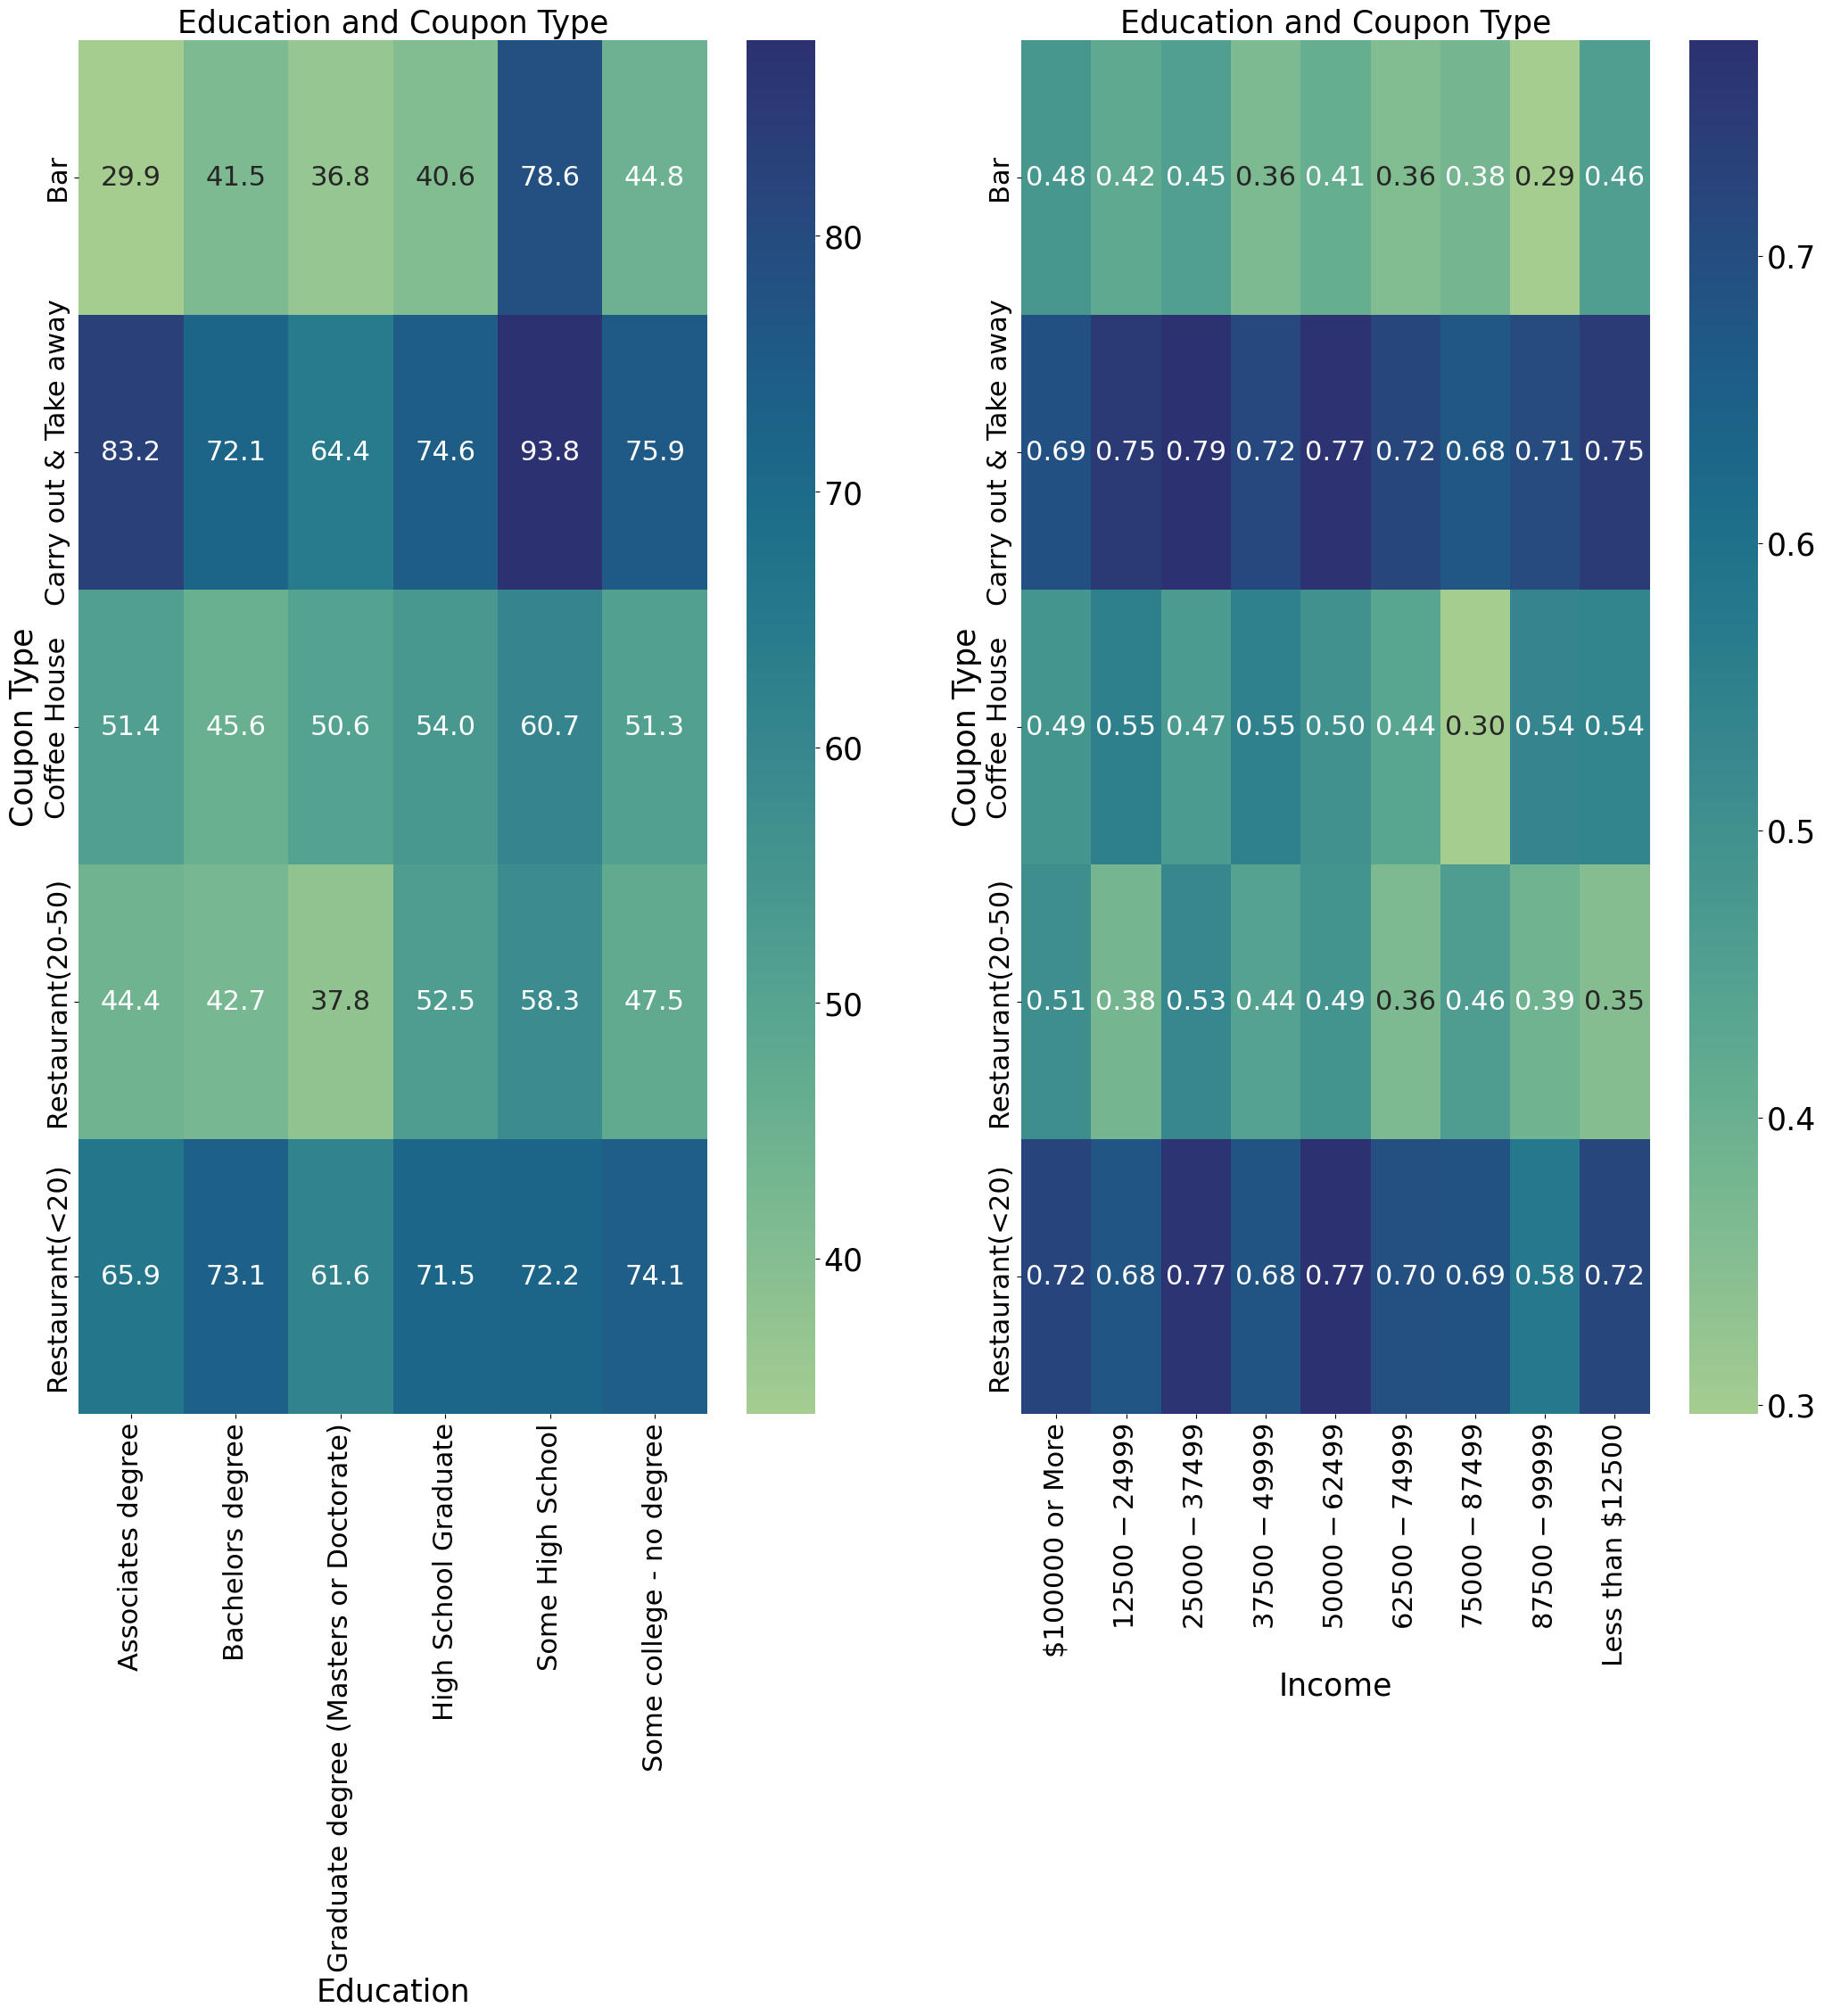

In [244]:
# Some important factors to consider for spending patterns are education and income levels
# We compare the acceptance rates for coupon types based on both
fig, axes = plt.subplots(1,2,figsize=(25,20))
#sns.heatmap(income_education_acceptance.T,cbar=True,annot=True,robust=True,fmt=".2f",ax=axes[0],cmap='crest')
figure_kwargs = {'fontsize': 22}

sns.heatmap(coupon_education_acceptance.T*100,cbar=True,annot=True,robust=True,fmt=".1f",ax=axes[0],cmap='crest',annot_kws=figure_kwargs)
axes[0].set_xlabel('Education',fontsize=25)
axes[0].set_ylabel('Coupon Type',fontsize=25)
axes[0].tick_params(labelsize=22)
axes[0].set_title('Education and Coupon Type',fontsize=25)
cbar1 = axes[0].collections[0].colorbar
cbar1.ax.tick_params(labelsize=25)

sns.heatmap(coupon_income_acceptance.T,cbar=True,annot=True,robust=True,fmt=".2f",ax=axes[1],cmap='crest',annot_kws=figure_kwargs)
axes[1].set_xlabel('Income',fontsize=25)
axes[1].set_ylabel('Coupon Type',fontsize=25)
axes[1].tick_params(labelsize=22)
axes[1].set_title('Education and Coupon Type',fontsize=25)
cbar2 = axes[1].collections[0].colorbar
cbar2.ax.tick_params(labelsize=25)

In [ ]:
carryout.

In [110]:
# Let's start by playing around with marital status
print(carryout.groupby('maritalstatus')['y'].sum())
print(carryout.groupby('maritalstatus')['y'].count())

print(carryout.groupby('maritalstatus')['y'].sum()/carryout.groupby('maritalstatus')['y'].count())

maritalstatus
Divorced              74
Married partner      645
Single               650
Unmarried partner    257
Widowed               17
Name: y, dtype: int64
maritalstatus
Divorced             103
Married partner      887
Single               860
Unmarried partner    363
Widowed               20
Name: y, dtype: int64
maritalstatus
Divorced             0.718447
Married partner      0.727170
Single               0.755814
Unmarried partner    0.707989
Widowed              0.850000
Name: y, dtype: float64


In [111]:
print(carryout[carryout['maritalstatus']=='Married partner'].groupby('time')['y'].sum())
print(carryout[carryout['maritalstatus']=='Married partner'].groupby('time')['y'].count())

print(carryout[carryout['maritalstatus']=='Married partner'].groupby('time')['y'].sum()/carryout[carryout['maritalstatus']=='Married partner'].groupby('time')['y'].count())

time
10AM    154
10PM    121
2PM      63
6PM     133
7AM     174
Name: y, dtype: int64
time
10AM    226
10PM    161
2PM      75
6PM     171
7AM     254
Name: y, dtype: int64
time
10AM    0.681416
10PM    0.751553
2PM     0.840000
6PM     0.777778
7AM     0.685039
Name: y, dtype: float64


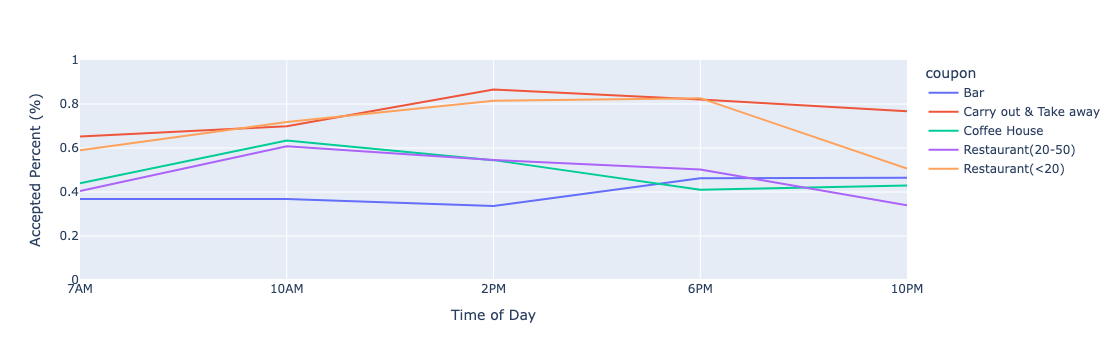

In [242]:

px.line(data_frame=time_coupon_acceptance.T,range_y=[0,1],labels={'index': 'Time of Day', 'value': 'Accepted Percent (%)'})

In [147]:
carryout['income'].unique()

array(['$62500 - $74999', '$12500 - $24999', '$75000 - $87499',
       '$50000 - $62499', '$37500 - $49999', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [161]:
var1='maritalstatus'
select_var1='Married partner'
var2='has_children'

# Married couples will accept take out coupons more frequently if they have children
print(carryout[carryout[var1]==select_var1].groupby(var2)['y'].sum())
print(carryout[carryout[var1]==select_var1].groupby(var2)['y'].count())

print(carryout[carryout[var1]==select_var1].groupby(var2)['y'].sum()/carryout[carryout[var1]==select_var1].groupby(var2)['y'].count())

has_children
0    171
1    474
Name: y, dtype: int64
has_children
0    246
1    641
Name: y, dtype: int64
has_children
0    0.695122
1    0.739470
Name: y, dtype: float64


In [205]:
# Carry out coupon is more likely to be accepted in the evening, for all weather types

var1='weather'
select_var1='Sunny'
select_var2='Rainy'
select_var3='Snowy'
var2='time'

print(carryout[carryout[var1]==select_var1].groupby(var2)['y'].sum())
print(carryout[carryout[var1]==select_var1].groupby(var2)['y'].count())

print(carryout[carryout[var1]==select_var1].groupby(var2)['y'].sum()/carryout[carryout[var1]==select_var1].groupby(var2)['y'].count(),'\n\n')

print(carryout[carryout[var1]==select_var2].groupby(var2)['y'].sum())
print(carryout[carryout[var1]==select_var2].groupby(var2)['y'].count())

print(carryout[carryout[var1]==select_var2].groupby(var2)['y'].sum()/carryout[carryout[var1]==select_var2].groupby(var2)['y'].count(),'\n\n')

print(carryout[carryout[var1]==select_var3].groupby(var2)['y'].sum())
print(carryout[carryout[var1]==select_var3].groupby(var2)['y'].count())

print(carryout[carryout[var1]==select_var3].groupby(var2)['y'].sum()/carryout[carryout[var1]==select_var3].groupby(var2)['y'].count())

var1_rate = carryout[carryout[var1]==select_var1].groupby(var2)['y'].sum()/carryout[carryout[var1]==select_var1].groupby(var2)['y'].count()
var2_rate = carryout[carryout[var1]==select_var2].groupby(var2)['y'].sum()/carryout[carryout[var1]==select_var2].groupby(var2)['y'].count()
var3_rate = carryout[carryout[var1]==select_var3].groupby(var2)['y'].sum()/carryout[carryout[var1]==select_var3].groupby(var2)['y'].count()

#px.line([var1_rate['y'],var2_rate['y']])
#px.line(var2_rate)
#px.line(var3_rate)

time
10AM    260
10PM    244
2PM     154
6PM     287
7AM     309
Name: y, dtype: int64
time
10AM    373
10PM    315
2PM     174
6PM     348
7AM     434
Name: y, dtype: int64
time
10AM    0.697051
10PM    0.774603
2PM     0.885057
6PM     0.824713
7AM     0.711982
Name: y, dtype: float64 


time
10AM    21
10PM     2
2PM     27
6PM     50
7AM     82
Name: y, dtype: int64
time
10AM     33
10PM      4
2PM      35
6PM      63
7AM     164
Name: y, dtype: int64
time
10AM    0.636364
10PM    0.500000
2PM     0.771429
6PM     0.793651
7AM     0.500000
Name: y, dtype: float64 


time
10AM    60
10PM    89
7AM     58
Name: y, dtype: int64
time
10AM     82
10PM    118
7AM      90
Name: y, dtype: int64
time
10AM    0.731707
10PM    0.754237
7AM     0.644444
Name: y, dtype: float64


In [189]:
# Married couples will accept take out coupons more frequently if they have children

var1='maritalstatus'
select_var1='Married partner'
var2='gender'

print(carryout[carryout[var1]==select_var1].groupby(var2)['y'].sum())
print(carryout[carryout[var1]==select_var1].groupby(var2)['y'].count())

print(carryout[carryout[var1]==select_var1].groupby(var2)['y'].sum()/carryout[carryout[var1]==select_var1].groupby(var2)['y'].count())

gender
Female    354
Male      291
Name: y, dtype: int64
gender
Female    500
Male      387
Name: y, dtype: int64
gender
Female    0.708000
Male      0.751938
Name: y, dtype: float64


In [191]:
var1='maritalstatus'
select_var1='Single'
var2='gender'

# Married couples will accept take out coupons more frequently if they have children
print(carryout[carryout[var1]==select_var1].groupby(var2)['y'].sum())
print(carryout[carryout[var1]==select_var1].groupby(var2)['y'].count())

print(carryout[carryout[var1]==select_var1].groupby(var2)['y'].sum()/carryout[carryout[var1]==select_var1].groupby(var2)['y'].count())

gender
Female    259
Male      391
Name: y, dtype: int64
gender
Female    348
Male      512
Name: y, dtype: int64
gender
Female    0.744253
Male      0.763672
Name: y, dtype: float64


In [453]:
## MARITAL STATUS & PASSENGER
variable = 'passenger'

class1 = 'Alone'
class2 = 'Kid'
class3 = 'Partner'
class4 = 'Friend'

lv1 = accept_rate(df=carryout,var1=variable,var2='maritalstatus',var_class=class1,accept='y')
lv2 = accept_rate(df=carryout,var1=variable,var2='maritalstatus',var_class=class2,accept='y')
lv3 = accept_rate(df=carryout,var1=variable,var2='maritalstatus',var_class=class3,accept='y')
lv4 = accept_rate(df=carryout,var1=variable,var2='maritalstatus',var_class=class4,accept='y')

marital_pass_acceptance = pd.DataFrame({class1: lv1, class2: lv2, class3: lv3, class4: lv4})

marital_pass_acceptance.head(10)

,Alone,Kid,Partner,Friend
maritalstatus,,,,
Divorced,0.690141,0.666667,NaN,0.807692
Married partner,0.728111,0.697479,0.775510,0.729825
Single,0.740741,0.333333,0.500000,0.800000
Unmarried partner,0.706977,0.769231,0.666667,0.714286
Widowed,0.900000,NaN,1.000000,0.777778


In [423]:
## AGE & EDUCATION
variable = 'education'

class1 = 'Some High School'
class2 = 'High School Graduate'
class3 = 'Some college - no degree'
class4 = 'Associates degree'
class5 = 'Bachelors degree'
class6 = 'Graduate degree (Masters or Doctorate)'

lv1 = accept_rate(df=carryout,var1=variable,var2='age',var_class=class1,accept='y')
lv2 = accept_rate(df=carryout,var1=variable,var2='age',var_class=class2,accept='y')
lv3 = accept_rate(df=carryout,var1=variable,var2='age',var_class=class3,accept='y')
lv4 = accept_rate(df=carryout,var1=variable,var2='age',var_class=class4,accept='y')
lv5 = accept_rate(df=carryout,var1=variable,var2='age',var_class=class5,accept='y')
lv6 = accept_rate(df=carryout,var1=variable,var2='age',var_class=class6,accept='y')

age_edu_acceptance = pd.DataFrame({class1: lv1, class2: lv2, class3: lv3, class4: lv4, class5: lv5, class6: lv6})
age_edu_acceptance = age_edu_acceptance.reindex(['below21', '21', '26', '31', '36','41','50plus'])
age_edu_acceptance = age_edu_acceptance.iloc[1:,1:]

age_edu_acceptance.head(10)

,High School Graduate,Some college - no degree,Associates degree,Bachelors degree,Graduate degree (Masters or Doctorate)
age,,,,,
21,0.822222,0.673469,0.914286,0.761364,0.666667
26,0.677419,0.789474,0.883721,0.724138,0.531915
31,0.787879,0.771186,0.695652,0.735043,0.542857
36,0.833333,0.888889,0.828571,0.615385,0.661017
41,0.777778,0.774194,0.807692,0.638298,0.714286
50plus,0.727273,0.787879,0.800000,0.795918,0.689189


<Axes: >

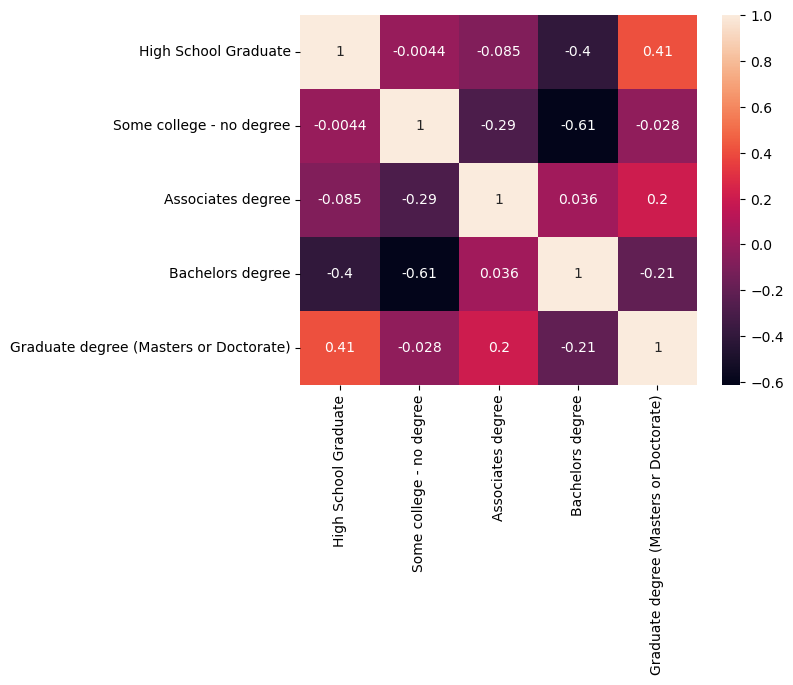

In [485]:
## In general, there is a correlation between 
sns.heatmap(age_edu_acceptance.corr(),annot=True)

<Axes: >

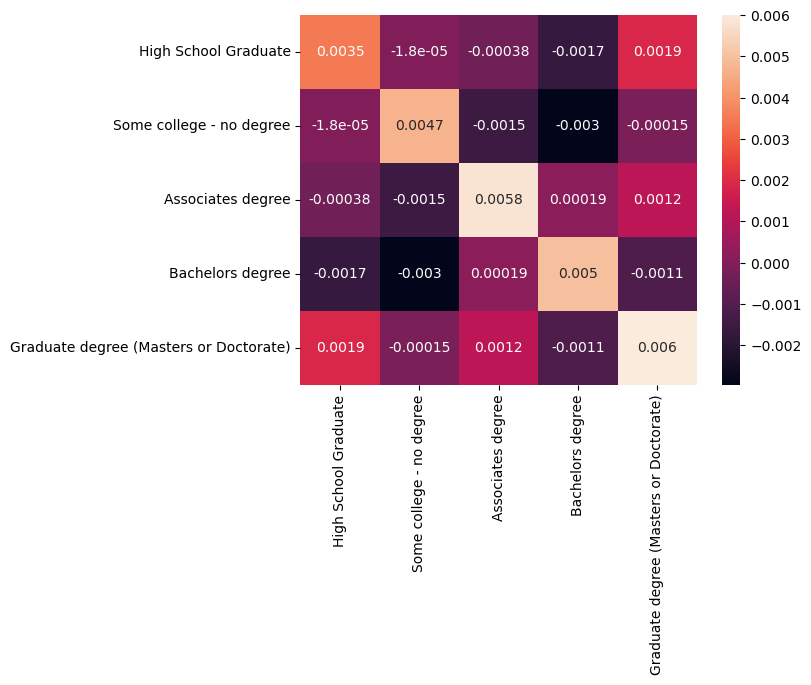

In [442]:
sns.heatmap(age_edu_acceptance.cov(),annot=True)

In [415]:
## MARITAL STATUS & EDUCATION
variable = 'education'

class1 = 'Some High School'
class2 = 'High School Graduate'
class3 = 'Some college - no degree'
class4 = 'Associates degree'
class5 = 'Bachelors degree'
class6 = 'Graduate degree (Masters or Doctorate)'

lv1 = accept_rate(df=carryout,var1=variable,var2='maritalstatus',var_class=class1,accept='y')
lv2 = accept_rate(df=carryout,var1=variable,var2='maritalstatus',var_class=class2,accept='y')
lv3 = accept_rate(df=carryout,var1=variable,var2='maritalstatus',var_class=class3,accept='y')
lv4 = accept_rate(df=carryout,var1=variable,var2='maritalstatus',var_class=class4,accept='y')
lv5 = accept_rate(df=carryout,var1=variable,var2='maritalstatus',var_class=class5,accept='y')
lv6 = accept_rate(df=carryout,var1=variable,var2='maritalstatus',var_class=class6,accept='y')

marital_edu_acceptance = pd.DataFrame({class1: lv1, class2: lv2, class3: lv3, class4: lv4, class5: lv5, class6: lv6})
marital_edu_acceptance = marital_edu_acceptance.reindex(['Single', 'Divorced', 'Widowed', 'Unmarried partner', 'Married partner'])

marital_edu_acceptance.head(10)

,Some High School,High School Graduate,Some college - no degree,Associates degree,Bachelors degree,Graduate degree (Masters or Doctorate)
maritalstatus,,,,,,
Single,0.909091,0.827957,0.763699,0.724138,0.769697,0.578947
Divorced,NaN,0.800000,0.842105,0.777778,0.727273,0.458333
Widowed,NaN,0.666667,0.833333,1.000000,NaN,NaN
Unmarried partner,1.000000,0.611111,0.765517,0.882353,0.687500,0.424242
Married partner,1.000000,0.629630,0.735915,0.879121,0.677419,0.725490


In [446]:
## TIME & EDUCATION
variable = 'education'

class1 = 'Some High School'
class2 = 'High School Graduate'
class3 = 'Some college - no degree'
class4 = 'Associates degree'
class5 = 'Bachelors degree'
class6 = 'Graduate degree (Masters or Doctorate)'

lv1 = accept_rate(df=carryout,var1=variable,var2='time',var_class=class1,accept='y')
lv2 = accept_rate(df=carryout,var1=variable,var2='time',var_class=class2,accept='y')
lv3 = accept_rate(df=carryout,var1=variable,var2='time',var_class=class3,accept='y')
lv4 = accept_rate(df=carryout,var1=variable,var2='time',var_class=class4,accept='y')
lv5 = accept_rate(df=carryout,var1=variable,var2='time',var_class=class5,accept='y')
lv6 = accept_rate(df=carryout,var1=variable,var2='time',var_class=class6,accept='y')

time_edu_acceptance = pd.DataFrame({class1: lv1, class2: lv2, class3: lv3, class4: lv4, class5: lv5, class6: lv6})
time_edu_acceptance = time_edu_acceptance.reindex(['7AM', '10AM', '2PM', '6PM', '10PM'])

time_edu_acceptance.head(10)

,Some High School,High School Graduate,Some college - no degree,Associates degree,Bachelors degree,Graduate degree (Masters or Doctorate)
time,,,,,,
7AM,1.0,0.580645,0.647303,0.750000,0.671171,0.603774
10AM,0.5,0.692308,0.765714,0.840909,0.674699,0.520000
2PM,1.0,0.882353,0.837500,1.000000,0.878378,0.826087
6PM,1.0,0.851852,0.821918,0.878049,0.792857,0.811321
10PM,1.0,0.918919,0.837209,0.826087,0.702128,0.650000


<Axes: >

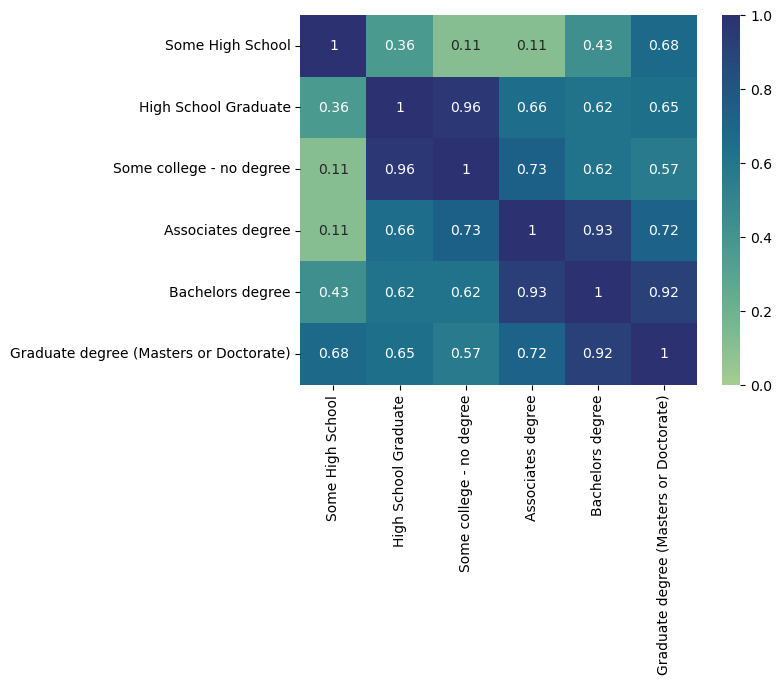

In [448]:
# There exists a correlation between education classes based on the time that coupons were delivered 
sns.heatmap(time_edu_acceptance.corr(),vmin=0,vmax=1,cmap='crest',annot=True)

In [144]:
## DIRECTION & DISTANCE
variable = 'distance'

class1 = 1
class2 = 2
class3 = 3

lv1 = accept_rate(df=carryout,var1=variable,var2='direction_same',var_class=class1,accept='y')
lv2 = accept_rate(df=carryout,var1=variable,var2='direction_same',var_class=class2,accept='y')
lv3 = accept_rate(df=carryout,var1=variable,var2='direction_same',var_class=class3,accept='y')

dir_dist_acceptance = pd.DataFrame({'5min': lv1, '15min': lv2, '25min': lv3})

dir_dist_acceptance.head(10)

,5min,15min,25min
direction_same,,,
0,0.754950,0.752326,0.740566
1,0.751174,0.646526,NaN


In [146]:
## TEMPERATURE & WEATHER
variable = 'weather'

class1 = 'Sunny'
class2 = 'Rainy'
class3 = 'Snowy'

lv1 = accept_rate(df=carryout,var1=variable,var2='temperature',var_class=class1,accept='y')
lv2 = accept_rate(df=carryout,var1=variable,var2='temperature',var_class=class2,accept='y')
lv3 = accept_rate(df=carryout,var1=variable,var2='temperature',var_class=class3,accept='y')

temp_weath_acceptance = pd.DataFrame({class1: lv1, class2: lv2, class3: lv3})

temp_weath_acceptance.head(10)

,Sunny,Rainy,Snowy
temperature,,,
30,0.790476,NaN,0.713793
55,0.854251,0.608696,NaN
80,0.727738,NaN,NaN


In [183]:
## HAS CHILDREN & WEATHER
variable = 'weather'

class1 = 'Sunny'
class2 = 'Rainy'
class3 = 'Snowy'

lv1 = accept_rate(df=carryout,var1=variable,var2='has_children',var_class=class1,accept='y')
lv2 = accept_rate(df=carryout,var1=variable,var2='has_children',var_class=class2,accept='y')
lv3 = accept_rate(df=carryout,var1=variable,var2='has_children',var_class=class3,accept='y')

child_weath_acceptance = pd.DataFrame({class1: lv1, class2: lv2, class3: lv3})

child_weath_acceptance.head(10)

,Sunny,Rainy,Snowy
has_children,,,
0,0.767819,0.563536,0.729885
1,0.756267,0.677966,0.689655


In [181]:
## AGE & MARITAL STATUS
variable = 'maritalstatus'

class1 = 'Single'
class2 = 'Divorced'
class3 = 'Widowed'
class4 = 'Unmarried partner'
class5 = 'Married partner'

lv1 = accept_rate(df=carryout,var1=variable,var2='age',var_class=class1,accept='y')
lv2 = accept_rate(df=carryout,var1=variable,var2='age',var_class=class2,accept='y')
lv3 = accept_rate(df=carryout,var1=variable,var2='age',var_class=class3,accept='y')
lv4 = accept_rate(df=carryout,var1=variable,var2='age',var_class=class4,accept='y')
lv5 = accept_rate(df=carryout,var1=variable,var2='age',var_class=class5,accept='y')

age_marital_acceptance = pd.DataFrame({class1: lv1, class2: lv2, class3: lv3, class4: lv4, class5: lv5})
age_marital_acceptance = age_marital_acceptance.reindex(['below21','21','26','31','36','41','46','50plus'])

age_marital_acceptance.head(10)

,Single,Divorced,Widowed,Unmarried partner,Married partner
age,,,,,
below21,0.833333,NaN,NaN,0.500000,NaN
21,0.764259,NaN,NaN,0.787611,0.594937
26,0.740909,NaN,NaN,0.701299,0.744361
31,0.750000,0.769231,NaN,0.591837,0.722222
36,0.770833,0.565217,NaN,0.860465,0.731707
41,0.638889,0.800000,NaN,0.800000,0.738806
46,0.720930,0.600000,NaN,0.818182,0.689655
50plus,0.775000,0.756757,0.85,0.586207,0.783951


In [375]:
## INCOME & MARITAL STATUS
variable = 'maritalstatus'

class1 = 'Single'
class2 = 'Divorced'
class3 = 'Widowed'
class4 = 'Unmarried partner'
class5 = 'Married partner'

lv1 = accept_rate(df=carryout,var1=variable,var2='income',var_class=class1,accept='y')
lv2 = accept_rate(df=carryout,var1=variable,var2='income',var_class=class2,accept='y')
lv3 = accept_rate(df=carryout,var1=variable,var2='income',var_class=class3,accept='y')
lv4 = accept_rate(df=carryout,var1=variable,var2='income',var_class=class4,accept='y')
lv5 = accept_rate(df=carryout,var1=variable,var2='income',var_class=class5,accept='y')

income_marital_acceptance = pd.DataFrame({class1: lv1, class2: lv2, class3: lv3, class4: lv4, class5: lv5})

income_marital_acceptance = income_marital_acceptance.reindex(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999',
                                                             '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999',
                                                             '$100000 or More'])
income_marital_acceptance = income_marital_acceptance.rename({'$12500 - $24999': '\$12500 - $24999', '$25000 - $37499': '\$25000 - $37499',
                                                            '$37500 - $49999': '\$37500 - $49999', '$50000 - $62499': '\$50000 - $62499',
                                                            '$62500 - $74999': '\$62500 - $74999', '$75000 - $87499': '\$75000 - $87499',
                                                            '$87500 - $99999': '\$87500 - $99999'})

income_marital_acceptance.head(10)

,Single,Divorced,Widowed,Unmarried partner,Married partner
income,,,,,
Less than $12500,0.769784,1.000000,0.833333,0.677419,0.538462
\$12500 - $24999,0.775362,0.660000,0.875000,0.805970,0.698113
\$25000 - $37499,0.830065,0.772727,NaN,0.783784,0.731481
\$37500 - $49999,0.694656,0.650000,NaN,0.652174,0.776786
\$50000 - $62499,0.815789,1.000000,NaN,0.720000,0.760274
\$62500 - $74999,0.878049,1.000000,NaN,0.395349,0.818182
\$75000 - $87499,0.469388,NaN,NaN,0.882353,0.747253
\$87500 - $99999,0.744186,NaN,NaN,0.812500,0.673469
$100000 or More,0.722222,NaN,NaN,0.684211,0.680000


In [373]:
## INCOME & AGE
variable = 'age'

class1 = 'below21'
class2 = '21'
class3 = '26'
class4 = '31'
class5 = '36'
class6 = '41'
class7 = '46'
class8 = '50plus'

lv1 = accept_rate(df=carryout,var1=variable,var2='income',var_class=class1,accept='y')
lv2 = accept_rate(df=carryout,var1=variable,var2='income',var_class=class2,accept='y')
lv3 = accept_rate(df=carryout,var1=variable,var2='income',var_class=class3,accept='y')
lv4 = accept_rate(df=carryout,var1=variable,var2='income',var_class=class4,accept='y')
lv5 = accept_rate(df=carryout,var1=variable,var2='income',var_class=class5,accept='y')
lv6 = accept_rate(df=carryout,var1=variable,var2='income',var_class=class6,accept='y')
lv7 = accept_rate(df=carryout,var1=variable,var2='income',var_class=class7,accept='y')
lv8 = accept_rate(df=carryout,var1=variable,var2='income',var_class=class8,accept='y')

income_age_acceptance = pd.DataFrame({class1: lv1, class2: lv2, class3: lv3, class4: lv4,
                                          class5: lv5, class6: lv6, class7: lv7, class8: lv8})

income_age_acceptance = income_marital_acceptance.reindex(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999',
                                                             '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999',
                                                             '$100000 or More'])
income_age_acceptance = income_marital_acceptance.rename({'$12500 - $24999': '\$12500 - $24999', '$25000 - $37499': '\$25000 - $37499',
                                                            '$37500 - $49999': '\$37500 - $49999', '$50000 - $62499': '\$50000 - $62499',
                                                            '$62500 - $74999': '\$62500 - $74999', '$75000 - $87499': '\$75000 - $87499',
                                                            '$87500 - $99999': '\$87500 - $99999'})

income_age_acceptance.head(10)

,below21,21,26,31,36,41,46,50plus
income,,,,,,,,
Less than $12500,0.722222,0.661290,0.848485,1.000000,0.777778,0.800000,0.636364,0.794118
\$12500 - $24999,0.666667,0.732558,0.800000,0.770833,0.710526,0.640000,0.866667,0.800000
\$25000 - $37499,0.375000,0.711111,0.838235,0.775862,0.822222,0.828571,0.736842,0.941176
\$37500 - $49999,0.727273,0.767442,0.662500,0.653846,0.812500,0.666667,0.760000,0.750000
\$50000 - $62499,1.000000,0.866667,0.764706,0.765957,0.826087,0.714286,0.500000,0.685185
\$62500 - $74999,1.000000,0.782609,0.612903,0.645161,0.600000,0.828571,0.625000,0.777778
\$75000 - $87499,NaN,0.555556,0.575758,0.527778,1.000000,0.705882,0.857143,0.909091
\$87500 - $99999,0.642857,0.884615,0.800000,0.666667,0.620690,0.600000,0.818182,0.615385
$100000 or More,0.785714,0.702128,0.680851,0.741935,0.653061,0.666667,0.466667,0.743590


<Axes: >

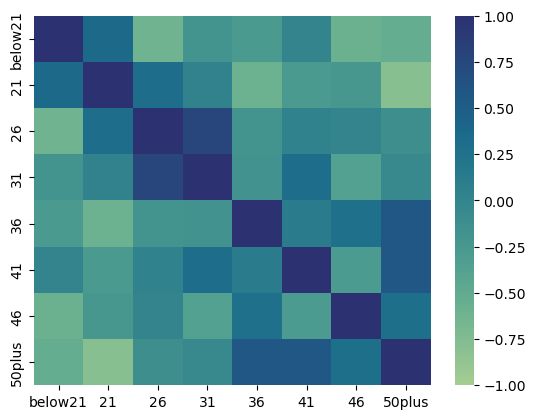

In [391]:
sns.heatmap(income_age_acceptance.corr(),cmap='crest',vmin=-1,vmax=1)

<Axes: xlabel='income', ylabel='income'>

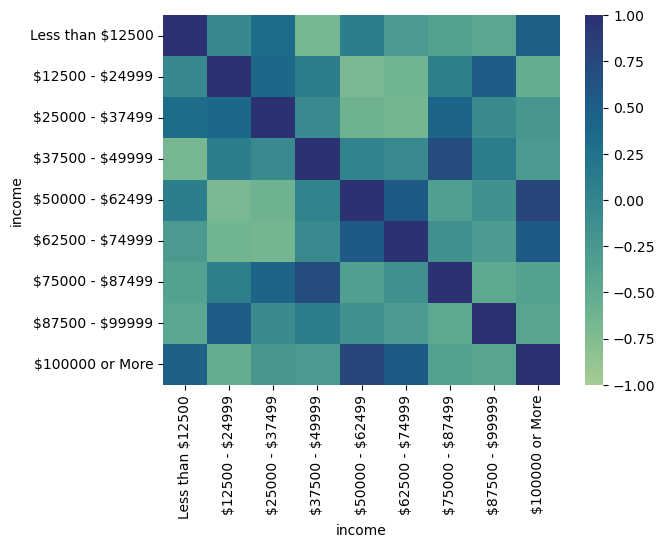

In [389]:
sns.heatmap(income_age_acceptance.T.corr(),cmap='crest',vmin=-1,vmax=1)

<Axes: >

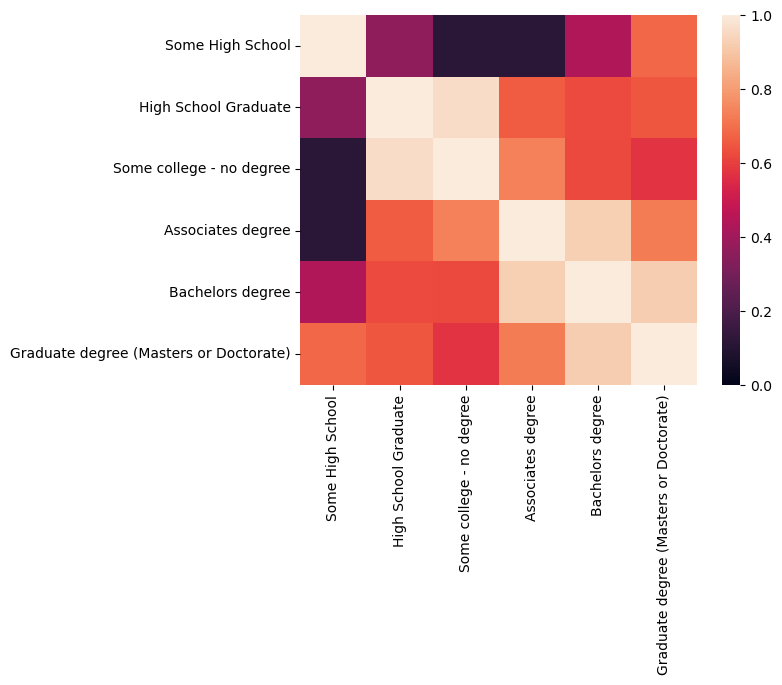

In [176]:
sns.heatmap(time_edu_acceptance.corr(),vmin=0,vmax=1)